# Q-Learning Experiments

This notebook evaluates the Q-Learning agent on the TestEnv environment.
We analyze convergence, cumulative reward, and policy stability under
different hyperparameter settings. <br>

All algoritm code is implemented in `src/models/Qlearning.py`. <br>
This notebook only shows the direct implementation of an experiment and analysis of the results.

We perform the following experiments:

- Q-learning with reward shaping and 5 bins <br>
- Q-learning without reward shaping and 5 bins <br>
- Q-learning with reward shaping and 3 bins <br>
- Q-learning without reward shaping and 3 bins <br>

In [1]:
#We import the necessary libraries and modules
from src.models.Qlearning import QAgent, number_of_actions_env_wrapper
from src.env.TestEnv import HydroElectric_Test
from src.utils.visualizations import *
import optuna
import numpy as np

### Hyperparameter optimization
We want to optimize the hyperparameter of the model first. To do this, we set a random seed and perform an optuna study.

In [2]:
#We set a random seed for reproducibility
SEED = 5
np.random.seed(SEED)

In [3]:
#We set the experiment configurations
AGENT_CONFIG = {
    "discount_rate": 0.99,
}

TRAIN_CONFIG = {
    "learning_rate": 0.1,
    "simulations" : 50,
    "epsilon": 0.6,
    "epsilon_decay": 0.995,
    "adaptive_epsilon" : True,
    "adaptive_learning_rate" : True,
    "use_reward_shaping": False,
}

parameter_dict = {
    'learning_rate': (0.01, 1.0),
    'epsilon': (0.01, 1.0),
    
}

In [4]:
#We initialize the environment and the agent
env = HydroElectric_Test("data/train.xlsx")
validate_env = HydroElectric_Test("data/validate.xlsx")

#We select one of the wrappers
env = number_of_actions_env_wrapper(env,3)
validate_env = number_of_actions_env_wrapper(validate_env, 3)

env.reset(seed=SEED)
agent = QAgent(env, **AGENT_CONFIG)

In [5]:
def objective(trial):
    learning_rate = trial.suggest_float("learning_rate", parameter_dict["learning_rate"][0], parameter_dict["learning_rate"][1], log=True)
    epsilon = trial.suggest_float("epsilon", parameter_dict["epsilon"][0], parameter_dict["epsilon"][1], log=True)

    TRAIN_CONFIG["learning_rate"] = learning_rate
    TRAIN_CONFIG["epsilon"] = epsilon

    agent.env = env
    agent.train(**TRAIN_CONFIG)

    agent.env = validate_env
    _, rewards, _ = agent.play()
    
    total_reward = sum(rewards)
    return total_reward

### Experiment 1: 3 Bins / no reward shaping

In [6]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)
print("Best hyperparameters: ", study.best_params)

[I 2026-01-27 18:23:51,759] A new study created in memory with name: no-name-2d4372ff-548a-4daf-bca6-2e1c197e8b91


0 -200558.03524605362
5 -12895.535473670123
mean reward -0.49 min reward -331.09 max reward 3310.88 max total reward -7842.74
10 -21705.46239860596
mean reward -0.83 min reward -1747.41 max reward 662.19 max total reward -6015.78
15 -14671.377347592497
mean reward -0.56 min reward -469.63 max reward 1059.48 max total reward -6015.78
20 -7987.1336082018015
mean reward -0.3 min reward -1747.41 max reward 1636.98 max total reward -6015.78
25 -14003.332244906813
mean reward -0.53 min reward -459.83 max reward 335.26 max total reward -669.29
30 -6559.401170766734
mean reward -0.25 min reward -276.83 max reward 1258.13 max total reward -669.29
35 8873.75418774768
mean reward 0.34 min reward -303.52 max reward 238.94 max total reward 8873.75
40 -7306.556629240616
mean reward -0.28 min reward -854.11 max reward 255.33 max total reward 8873.75
45 -11035.749280842383
mean reward -0.42 min reward -465.64 max reward 338.13 max total reward 8873.75


[I 2026-01-27 18:25:01,486] Trial 0 finished with value: 3135.305485742389 and parameters: {'learning_rate': 0.8288125365684139, 'epsilon': 0.02490976641111492}. Best is trial 0 with value: 3135.305485742389.


Total reward in evaluation: 3135.31
avg reward 0.18
max 104.7958993366524 min -121.32527206014
0 -194774.82887374164
5 -11193.340843915497
mean reward -0.43 min reward -344.96 max reward 529.74 max total reward 8873.75
10 -12210.547669930304
mean reward -0.46 min reward -333.94 max reward 369.6 max total reward 8873.75
15 -10730.717060316761
mean reward -0.41 min reward -367.86 max reward 238.38 max total reward 8873.75
20 -12131.139580403873
mean reward -0.46 min reward -1747.41 max reward 1258.13 max total reward 8873.75
25 -12069.7926963264
mean reward -0.46 min reward -449.53 max reward 251.63 max total reward 8873.75
30 -13407.689659893138
mean reward -0.51 min reward -1747.41 max reward 331.19 max total reward 8873.75
35 -10683.030121667265
mean reward -0.41 min reward -484.44 max reward 264.87 max total reward 8873.75
40 -12001.373041840736
mean reward -0.46 min reward -1747.41 max reward 1258.13 max total reward 8873.75
45 -12001.501798193742
mean reward -0.46 min reward -513.3

[I 2026-01-27 18:26:11,422] Trial 1 finished with value: 47.0689081550964 and parameters: {'learning_rate': 0.010257621943885742, 'epsilon': 0.07990649215484506}. Best is trial 0 with value: 3135.305485742389.


Total reward in evaluation: 47.07
avg reward 0.0
max 17.481433985136 min 0.0
0 -186707.07294229188
5 -11439.102141524392
mean reward -0.43 min reward -459.99 max reward 256.2 max total reward 8873.75
10 -11174.173069581297
mean reward -0.42 min reward -551.87 max reward 238.38 max total reward 8873.75
15 -10968.896448110147
mean reward -0.42 min reward -317.46 max reward 198.65 max total reward 8873.75
20 -9525.397202561664
mean reward -0.36 min reward -314.59 max reward 335.26 max total reward 8873.75
25 -12546.965947814708
mean reward -0.48 min reward -416.82 max reward 238.38 max total reward 8873.75
30 -12492.243026286424
mean reward -0.47 min reward -400.58 max reward 314.8 max total reward 8873.75
35 -11306.644963058761
mean reward -0.43 min reward -367.88 max reward 237.48 max total reward 8873.75
40 -7520.260537953623
mean reward -0.29 min reward -259.26 max reward 3310.88 max total reward 8873.75
45 -10822.493852988138
mean reward -0.41 min reward -422.41 max reward 213.7 max 

[I 2026-01-27 18:27:21,912] Trial 2 finished with value: 47.0689081550964 and parameters: {'learning_rate': 0.02832132139174072, 'epsilon': 0.017231571604740363}. Best is trial 0 with value: 3135.305485742389.


Total reward in evaluation: 47.07
avg reward 0.0
max 17.481433985136 min 0.0
0 -193133.18022267375
5 -11825.30498298642
mean reward -0.45 min reward -919.71 max reward 1019.05 max total reward 8873.75
10 -10048.693186948098
mean reward -0.38 min reward -367.88 max reward 237.48 max total reward 8873.75
15 -11565.394465808182
mean reward -0.44 min reward -644.04 max reward 264.86 max total reward 8873.75
20 -10842.908724570032
mean reward -0.41 min reward -316.89 max reward 331.09 max total reward 8873.75
25 -10650.877085194847
mean reward -0.4 min reward -2273.58 max reward 662.18 max total reward 8873.75
30 -12164.166688575568
mean reward -0.46 min reward -2273.58 max reward 662.18 max total reward 8873.75
35 -11110.867617436981
mean reward -0.42 min reward -956.49 max reward 1258.13 max total reward 8873.75
40 -11054.573132651423
mean reward -0.42 min reward -1471.5 max reward 1258.13 max total reward 8873.75
45 -11869.233707629382
mean reward -0.45 min reward -919.69 max reward 662.

[I 2026-01-27 18:28:31,399] Trial 3 finished with value: 47.0689081550964 and parameters: {'learning_rate': 0.010641906230914858, 'epsilon': 0.17972133108040808}. Best is trial 0 with value: 3135.305485742389.


Total reward in evaluation: 47.07
avg reward 0.0
max 17.481433985136 min 0.0
0 -183441.47101406244
5 -13654.698054749697
mean reward -0.52 min reward -2273.58 max reward 662.18 max total reward 8873.75
10 -11891.34448431799
mean reward -0.45 min reward -367.88 max reward 222.56 max total reward 8873.75
15 -10208.241437836625
mean reward -0.39 min reward -1747.41 max reward 1258.13 max total reward 8873.75
20 -12317.486810731563
mean reward -0.47 min reward -735.75 max reward 662.18 max total reward 8873.75
25 -11741.71341561322
mean reward -0.45 min reward -696.61 max reward 260.35 max total reward 8873.75
30 -10659.552320385032
mean reward -0.41 min reward -367.88 max reward 246.34 max total reward 8873.75
35 -11509.631192947576
mean reward -0.44 min reward -386.51 max reward 242.04 max total reward 8873.75
40 -11200.072961801203
mean reward -0.43 min reward -367.88 max reward 278.29 max total reward 8873.75
45 -11629.887419402494
mean reward -0.44 min reward -675.95 max reward 236.16

[I 2026-01-27 18:29:40,857] Trial 4 finished with value: 47.0689081550964 and parameters: {'learning_rate': 0.012332260609801419, 'epsilon': 0.030989709534460497}. Best is trial 0 with value: 3135.305485742389.


Total reward in evaluation: 47.07
avg reward 0.0
max 17.481433985136 min 0.0
0 -189690.62202112898
5 -10811.400205613252
mean reward -0.41 min reward -737.59 max reward 662.19 max total reward 8873.75
10 -11955.000153742472
mean reward -0.45 min reward -1962.28 max reward 662.19 max total reward 8873.75
15 -11607.739119433858
mean reward -0.44 min reward -919.69 max reward 463.71 max total reward 8873.75
20 -12103.128083994741
mean reward -0.46 min reward -367.86 max reward 398.83 max total reward 8873.75
25 -11917.61445908393
mean reward -0.45 min reward -1471.5 max reward 1258.13 max total reward 8873.75
30 -11887.473700471348
mean reward -0.45 min reward -1471.5 max reward 1258.13 max total reward 8873.75
35 -11043.568511097756
mean reward -0.42 min reward -283.23 max reward 221.43 max total reward 8873.75
40 -9713.185768292396
mean reward -0.37 min reward -416.82 max reward 264.87 max total reward 8873.75
45 -10814.302741685286
mean reward -0.41 min reward -554.57 max reward 662.18

[I 2026-01-27 18:30:50,923] Trial 5 finished with value: 47.0689081550964 and parameters: {'learning_rate': 0.07904640170700626, 'epsilon': 0.03141987047795197}. Best is trial 0 with value: 3135.305485742389.


Total reward in evaluation: 47.07
avg reward 0.0
max 17.481433985136 min 0.0
0 -193148.06568333288
5 -11232.745438189158
mean reward -0.43 min reward -644.04 max reward 235.75 max total reward 8873.75
10 -10605.777781365428
mean reward -0.4 min reward -317.46 max reward 304.14 max total reward 8873.75
15 -11292.155090966851
mean reward -0.43 min reward -642.84 max reward 236.16 max total reward 8873.75
20 -9371.512759704217
mean reward -0.36 min reward -367.88 max reward 198.8 max total reward 8873.75
25 -11539.136998802203
mean reward -0.44 min reward -368.02 max reward 238.38 max total reward 8873.75
30 -11478.686994692256
mean reward -0.44 min reward -513.33 max reward 501.56 max total reward 8873.75
35 -10728.40165321444
mean reward -0.41 min reward -343.72 max reward 662.19 max total reward 8873.75
40 -11527.654875116536
mean reward -0.44 min reward -330.89 max reward 331.09 max total reward 8873.75
45 -11364.095312018959
mean reward -0.43 min reward -459.83 max reward 314.19 max 

[I 2026-01-27 18:32:03,559] Trial 6 finished with value: 37.124503199578804 and parameters: {'learning_rate': 0.12312870611820809, 'epsilon': 0.026672199874832762}. Best is trial 0 with value: 3135.305485742389.


Total reward in evaluation: 37.12
avg reward 0.0
max 15.667073033648402 min 0
0 -194228.55940422733
5 -11959.728822775392
mean reward -0.45 min reward -449.53 max reward 300.8 max total reward 8873.75
10 -11741.63984055436
mean reward -0.45 min reward -675.95 max reward 256.2 max total reward 8873.75
15 -10260.769615359111
mean reward -0.39 min reward -317.46 max reward 263.14 max total reward 8873.75
20 -11794.282795168703
mean reward -0.45 min reward -919.69 max reward 338.13 max total reward 8873.75
25 -11742.050389382768
mean reward -0.45 min reward -1747.41 max reward 1258.13 max total reward 8873.75
30 -11130.091308815945
mean reward -0.42 min reward -388.15 max reward 277.56 max total reward 8873.75
35 -11455.200364402954
mean reward -0.44 min reward -919.69 max reward 238.38 max total reward 8873.75
40 -11518.972282420471
mean reward -0.44 min reward -551.81 max reward 398.83 max total reward 8873.75
45 -11251.40333736545
mean reward -0.43 min reward -355.83 max reward 247.48 m

[I 2026-01-27 18:33:20,611] Trial 7 finished with value: 47.0689081550964 and parameters: {'learning_rate': 0.08645562950296805, 'epsilon': 0.0644832382803815}. Best is trial 0 with value: 3135.305485742389.


Total reward in evaluation: 47.07
avg reward 0.0
max 17.481433985136 min 0.0
0 -182250.25484109094
5 -14458.048508179532
mean reward -0.55 min reward -1747.41 max reward 348.79 max total reward 8873.75
10 -12352.498973991254
mean reward -0.47 min reward -361.6 max reward 213.7 max total reward 8873.75
15 -11210.734396580337
mean reward -0.43 min reward -696.61 max reward 223.79 max total reward 8873.75
20 -3825.4176288316517
mean reward -0.15 min reward -367.88 max reward 251.63 max total reward 8873.75
25 -12077.118156186787
mean reward -0.46 min reward -416.82 max reward 338.13 max total reward 8873.75
30 -9955.71393256477
mean reward -0.38 min reward -338.45 max reward 321.55 max total reward 8873.75
35 -3146.408697874945
mean reward -0.12 min reward -296.8 max reward 662.19 max total reward 8873.75
40 -15867.924115329131
mean reward -0.6 min reward -1962.28 max reward 662.19 max total reward 8873.75
45 -9814.167127827413
mean reward -0.37 min reward -790.09 max reward 238.38 max to

[I 2026-01-27 18:34:38,495] Trial 8 finished with value: 47.0689081550964 and parameters: {'learning_rate': 0.572975589003336, 'epsilon': 0.011438790023832076}. Best is trial 0 with value: 3135.305485742389.


Total reward in evaluation: 47.07
avg reward 0.0
max 17.481433985136 min 0.0
0 -183689.5645592876
5 -11407.491353235773
mean reward -0.43 min reward -327.43 max reward 231.8 max total reward 8873.75
10 -11734.116055035329
mean reward -0.45 min reward -1471.5 max reward 1258.13 max total reward 8873.75
15 -10137.05903989075
mean reward -0.39 min reward -919.69 max reward 223.84 max total reward 8873.75
20 -10346.622144291085
mean reward -0.39 min reward -343.72 max reward 662.19 max total reward 8873.75
25 -11633.636804401982
mean reward -0.44 min reward -388.15 max reward 198.65 max total reward 8873.75
30 -11560.055859537273
mean reward -0.44 min reward -367.88 max reward 338.13 max total reward 8873.75
35 -11737.70357490535
mean reward -0.45 min reward -459.84 max reward 217.87 max total reward 8873.75
40 -12730.944061247093
mean reward -0.48 min reward -919.69 max reward 463.71 max total reward 8873.75
45 -10529.64083895594
mean reward -0.4 min reward -885.71 max reward 486.69 max t

[I 2026-01-27 18:35:54,067] Trial 9 finished with value: 47.0689081550964 and parameters: {'learning_rate': 0.05278372218629124, 'epsilon': 0.43526434450662127}. Best is trial 0 with value: 3135.305485742389.


Total reward in evaluation: 47.07
avg reward 0.0
max 17.481433985136 min 0.0
0 -197241.19948908608
5 -9191.80714993985
mean reward -0.35 min reward -919.71 max reward 1258.13 max total reward 8873.75
10 -18064.631103693297
mean reward -0.69 min reward -367.86 max reward 388.13 max total reward 8873.75
15 -11567.385488651007
mean reward -0.44 min reward -463.5 max reward 300.11 max total reward 8873.75
20 -11491.592632266764
mean reward -0.44 min reward -353.14 max reward 323.66 max total reward 8873.75
25 -4234.528310119938
mean reward -0.16 min reward -465.64 max reward 662.18 max total reward 8873.75
30 -5221.109763134453
mean reward -0.2 min reward -353.14 max reward 662.18 max total reward 8873.75
35 -5931.336918565735
mean reward -0.23 min reward -919.69 max reward 662.19 max total reward 8873.75
40 -4091.3576220834966
mean reward -0.16 min reward -919.69 max reward 264.98 max total reward 8873.75
45 10207.12391444259
mean reward 0.39 min reward -735.75 max reward 1258.13 max tota

[I 2026-01-27 18:37:09,736] Trial 10 finished with value: 2867.167805482413 and parameters: {'learning_rate': 0.91253546821168, 'epsilon': 0.6744848154603954}. Best is trial 0 with value: 3135.305485742389.


Total reward in evaluation: 2867.17
avg reward 0.16
max 104.7958993366524 min -140.16048712830002
0 -191501.82226983775
5 -29870.439922332753
mean reward -1.14 min reward -4598.44 max reward 1258.13 max total reward 10207.12
10 -30658.189275031757
mean reward -1.17 min reward -919.69 max reward 1258.13 max total reward 10207.12
15 -16894.005564943644
mean reward -0.64 min reward -459.84 max reward 1636.98 max total reward 10207.12
20 -14823.209209807868
mean reward -0.56 min reward -367.88 max reward 321.55 max total reward 10207.12
25 -6933.712484215564
mean reward -0.26 min reward -839.77 max reward 1258.13 max total reward 10207.12
30 -3126.587904018312
mean reward -0.12 min reward -919.69 max reward 1258.13 max total reward 10207.12
35 -12460.912231971783
mean reward -0.47 min reward -4598.44 max reward 1258.13 max total reward 10207.12
40 -7350.012429755233
mean reward -0.28 min reward -839.77 max reward 264.98 max total reward 10207.12
45 13060.352679773783
mean reward 0.5 min re

[I 2026-01-27 18:38:24,928] Trial 11 finished with value: -1197.5742025585948 and parameters: {'learning_rate': 0.9945392905864382, 'epsilon': 0.9107600533970542}. Best is trial 0 with value: 3135.305485742389.


Total reward in evaluation: -1197.57
avg reward -0.07
max 158.9221271376 min -147.609961837875
0 -190023.91589326388
5 -11313.507308798604
mean reward -0.43 min reward -642.84 max reward 264.87 max total reward 13409.01
10 -10889.460400061345
mean reward -0.41 min reward -436.37 max reward 662.19 max total reward 13409.01
15 -14608.89961486033
mean reward -0.56 min reward -3241.97 max reward 1412.84 max total reward 13409.01
20 -13657.113523932068
mean reward -0.52 min reward -1415.35 max reward 263.76 max total reward 13409.01
25 -10539.251049644108
mean reward -0.4 min reward -2273.58 max reward 217.25 max total reward 13409.01
30 -9926.033263320263
mean reward -0.38 min reward -554.57 max reward 1636.98 max total reward 13409.01
35 -13453.80650678658
mean reward -0.51 min reward -919.69 max reward 1258.13 max total reward 13409.01
40 -8437.077139156312
mean reward -0.32 min reward -342.14 max reward 321.55 max total reward 13409.01
45 -11138.809217540238
mean reward -0.42 min reward

[I 2026-01-27 18:39:40,206] Trial 12 finished with value: 42.217368773868 and parameters: {'learning_rate': 0.35651449718563083, 'epsilon': 0.29665220284399735}. Best is trial 0 with value: 3135.305485742389.


Total reward in evaluation: 42.22
avg reward 0.0
max 17.481433985136 min 0
0 -190676.6107861702
5 -10635.522706161379
mean reward -0.4 min reward -321.82 max reward 173.81 max total reward 13409.01
10 -11679.332066208171
mean reward -0.44 min reward -919.69 max reward 1059.48 max total reward 13409.01
15 -11925.60029597261
mean reward -0.45 min reward -1747.41 max reward 463.52 max total reward 13409.01
20 -11503.514162553962
mean reward -0.44 min reward -345.71 max reward 215.11 max total reward 13409.01
25 -12302.406130917023
mean reward -0.47 min reward -331.09 max reward 264.87 max total reward 13409.01
30 -16719.99245748328
mean reward -0.64 min reward -4598.44 max reward 264.87 max total reward 13409.01
35 -10326.905500017801
mean reward -0.39 min reward -361.6 max reward 259.31 max total reward 13409.01
40 -11382.323532851533
mean reward -0.43 min reward -919.69 max reward 397.35 max total reward 13409.01
45 -11289.446793050198
mean reward -0.43 min reward -551.87 max reward 338

[I 2026-01-27 18:40:58,285] Trial 13 finished with value: 42.217368773868 and parameters: {'learning_rate': 0.2605636437278269, 'epsilon': 0.7866948799550463}. Best is trial 0 with value: 3135.305485742389.


Total reward in evaluation: 42.22
avg reward 0.0
max 17.481433985136 min 0
0 -184726.32796294702
5 -1468.0190331642937
mean reward -0.06 min reward -1747.41 max reward 1636.98 max total reward 13409.01
10 -13934.06835749576
mean reward -0.53 min reward -386.27 max reward 662.19 max total reward 13409.01
15 -12775.061219790772
mean reward -0.49 min reward -463.5 max reward 662.18 max total reward 13409.01
20 -16134.255200893826
mean reward -0.61 min reward -4598.44 max reward 2334.22 max total reward 13409.01
25 -10809.263095403523
mean reward -0.41 min reward -437.22 max reward 264.87 max total reward 13409.01
30 -1825.3780808012973
mean reward -0.07 min reward -1747.41 max reward 1258.13 max total reward 13409.01
35 -4105.927118739065
mean reward -0.16 min reward -644.04 max reward 1258.13 max total reward 13409.01
40 -12584.985532480354
mean reward -0.48 min reward -735.75 max reward 662.18 max total reward 13409.01
45 -6886.679300839046
mean reward -0.26 min reward -342.14 max rewar

[I 2026-01-27 18:42:14,002] Trial 14 finished with value: 1262.9423723530901 and parameters: {'learning_rate': 0.8033229320377168, 'epsilon': 0.15195028151753615}. Best is trial 0 with value: 3135.305485742389.


Total reward in evaluation: 1262.94
avg reward 0.07
max 94.42623054092401 min -121.32527206014
0 -197113.0941118533
5 -11412.673980381891
mean reward -0.43 min reward -386.45 max reward 226.5 max total reward 13409.01
10 -13522.66172562072
mean reward -0.51 min reward -459.99 max reward 218.54 max total reward 13409.01
15 -10397.809048490584
mean reward -0.4 min reward -459.99 max reward 662.18 max total reward 13409.01
20 -10489.246660140621
mean reward -0.4 min reward -298.83 max reward 218.6 max total reward 13409.01
25 -10638.970433419525
mean reward -0.4 min reward -459.83 max reward 255.33 max total reward 13409.01
30 -9083.48774103438
mean reward -0.35 min reward -367.88 max reward 604.63 max total reward 13409.01
35 -11665.633861749635
mean reward -0.44 min reward -885.71 max reward 486.69 max total reward 13409.01
40 -12992.115654934198
mean reward -0.49 min reward -3241.97 max reward 1412.84 max total reward 13409.01
45 -12280.880275946347
mean reward -0.47 min reward -446.6 

[I 2026-01-27 18:43:29,499] Trial 15 finished with value: 47.0689081550964 and parameters: {'learning_rate': 0.2694567789217559, 'epsilon': 0.05368961548243127}. Best is trial 0 with value: 3135.305485742389.


Total reward in evaluation: 47.07
avg reward 0.0
max 17.481433985136 min 0.0
0 -189516.88809014272
5 -6025.935559994602
mean reward -0.23 min reward -287.97 max reward 662.18 max total reward 13409.01
10 4355.610457485591
mean reward 0.17 min reward -919.69 max reward 3310.88 max total reward 13409.01
15 -9660.847986672203
mean reward -0.37 min reward -1471.5 max reward 1258.13 max total reward 13409.01
20 -10435.83419216067
mean reward -0.4 min reward -309.11 max reward 531.06 max total reward 13409.01
25 2285.5335846754115
mean reward 0.09 min reward -919.69 max reward 3310.88 max total reward 13409.01
30 -13016.571268748678
mean reward -0.49 min reward -1415.35 max reward 223.75 max total reward 13618.83
35 -12287.213617013029
mean reward -0.47 min reward -839.77 max reward 278.11 max total reward 13618.83
40 -10601.703930356345
mean reward -0.4 min reward -422.41 max reward 264.87 max total reward 13618.83
45 3369.2169478714127
mean reward 0.13 min reward -1747.41 max reward 1258.1

[I 2026-01-27 18:44:43,784] Trial 16 finished with value: 37.124503199578804 and parameters: {'learning_rate': 0.4995351501374511, 'epsilon': 0.4025795467707237}. Best is trial 0 with value: 3135.305485742389.


Total reward in evaluation: 37.12
avg reward 0.0
max 15.667073033648402 min 0
0 -189704.2504110315
5 -10445.110453831667
mean reward -0.4 min reward -919.71 max reward 1636.98 max total reward 13618.83
10 -10576.065229595426
mean reward -0.4 min reward -367.88 max reward 238.38 max total reward 13618.83
15 -10711.357990829534
mean reward -0.41 min reward -366.33 max reward 242.04 max total reward 13618.83
20 -10246.062696843604
mean reward -0.39 min reward -1747.41 max reward 331.19 max total reward 13618.83
25 -10783.462284262918
mean reward -0.41 min reward -790.09 max reward 1258.13 max total reward 13618.83
30 -12909.725568272182
mean reward -0.49 min reward -919.69 max reward 637.71 max total reward 13618.83
35 -11530.475007122608
mean reward -0.44 min reward -956.49 max reward 331.19 max total reward 13618.83
40 -11377.100439423075
mean reward -0.43 min reward -919.69 max reward 662.18 max total reward 13618.83
45 -13545.592128465023
mean reward -0.51 min reward -1415.35 max rewa

[I 2026-01-27 18:45:56,944] Trial 17 finished with value: 47.0689081550964 and parameters: {'learning_rate': 0.20050977831740105, 'epsilon': 0.1473869319382959}. Best is trial 0 with value: 3135.305485742389.


Total reward in evaluation: 47.07
avg reward 0.0
max 17.481433985136 min 0.0
0 -181647.9673655103
5 -7752.604033828272
mean reward -0.29 min reward -268.55 max reward 662.19 max total reward 13618.83
10 -11019.415209025103
mean reward -0.42 min reward -919.69 max reward 662.19 max total reward 13618.83
15 -12125.080837806912
mean reward -0.46 min reward -459.84 max reward 397.35 max total reward 13618.83
20 -13077.533273518251
mean reward -0.5 min reward -386.51 max reward 331.1 max total reward 13618.83
25 -9476.414770625775
mean reward -0.36 min reward -643.78 max reward 688.68 max total reward 13618.83
30 -7226.3228640536745
mean reward -0.27 min reward -367.88 max reward 531.06 max total reward 13618.83
35 11761.99920384184
mean reward 0.45 min reward -295.24 max reward 251.64 max total reward 13618.83
40 -11906.95858330925
mean reward -0.45 min reward -642.84 max reward 397.35 max total reward 18949.42
45 -8682.432302440291
mean reward -0.33 min reward -367.88 max reward 251.64 ma

[I 2026-01-27 18:47:08,823] Trial 18 finished with value: 15206.954480803852 and parameters: {'learning_rate': 0.5968732016856504, 'epsilon': 0.01037499214056237}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: 15206.95
avg reward 0.87
max 103.034512427544 min -120.44237135382001
0 -209162.19382287475
5 -10325.846019170196
mean reward -0.39 min reward -388.15 max reward 331.09 max total reward 18949.42
10 -10907.812226992808
mean reward -0.41 min reward -327.43 max reward 223.84 max total reward 18949.42
15 -10611.596832770683
mean reward -0.4 min reward -885.71 max reward 264.87 max total reward 18949.42
20 -10786.018281807712
mean reward -0.41 min reward -417.35 max reward 662.18 max total reward 18949.42
25 -9933.431971239219
mean reward -0.38 min reward -294.3 max reward 314.8 max total reward 18949.42
30 -11485.641309255694
mean reward -0.44 min reward -919.69 max reward 231.8 max total reward 18949.42
35 -11965.38085879702
mean reward -0.45 min reward -310.82 max reward 222.49 max total reward 18949.42
40 -9138.012009903754
mean reward -0.35 min reward -956.49 max reward 1258.13 max total reward 18949.42
45 -12149.337635462332
mean reward -0.46 min reward -91

[I 2026-01-27 18:48:23,943] Trial 19 finished with value: 42.217368773868 and parameters: {'learning_rate': 0.14891948104168432, 'epsilon': 0.01010176381228671}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: 42.22
avg reward 0.0
max 17.481433985136 min 0
0 -194887.39135629238
5 -9797.334298861177
mean reward -0.37 min reward -316.21 max reward 1019.05 max total reward 18949.42
10 -12062.014341103748
mean reward -0.46 min reward -551.81 max reward 215.15 max total reward 18949.42
15 -4738.447403504901
mean reward -0.18 min reward -4598.44 max reward 314.8 max total reward 18949.42
20 -11865.373960041567
mean reward -0.45 min reward -919.69 max reward 397.31 max total reward 18949.42
25 -10589.074771503032
mean reward -0.4 min reward -361.6 max reward 264.87 max total reward 18949.42
30 -13705.686306290261
mean reward -0.52 min reward -1747.41 max reward 1258.13 max total reward 18949.42
35 -11965.47102911915
mean reward -0.45 min reward -919.69 max reward 662.18 max total reward 18949.42
40 -8216.297762282955
mean reward -0.31 min reward -388.15 max reward 263.14 max total reward 18949.42
45 -11154.045876479584
mean reward -0.42 min reward -737.59 max reward 662.

[I 2026-01-27 18:49:39,085] Trial 20 finished with value: 47.0689081550964 and parameters: {'learning_rate': 0.4968719905840892, 'epsilon': 0.018104901821562294}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: 47.07
avg reward 0.0
max 17.481433985136 min 0.0
0 -189299.9501488418
5 -5618.331777661829
mean reward -0.21 min reward -400.58 max reward 279.46 max total reward 18949.42
10 -18192.877499790364
mean reward -0.69 min reward -1747.41 max reward 1258.13 max total reward 18949.42
15 -10065.69581080019
mean reward -0.38 min reward -919.69 max reward 662.19 max total reward 18949.42
20 -4080.1857398959833
mean reward -0.16 min reward -400.58 max reward 397.31 max total reward 18949.42
25 -10994.880052397015
mean reward -0.42 min reward -735.75 max reward 662.18 max total reward 18949.42
30 -3723.3107343961983
mean reward -0.14 min reward -459.83 max reward 662.19 max total reward 18949.42
35 -7489.864964387168
mean reward -0.28 min reward -1471.5 max reward 1258.13 max total reward 18949.42
40 -10759.09348901788
mean reward -0.41 min reward -331.09 max reward 264.87 max total reward 18949.42
45 -8389.579043157844
mean reward -0.32 min reward -342.14 max reward 26

[I 2026-01-27 18:50:53,781] Trial 21 finished with value: 9798.271563360975 and parameters: {'learning_rate': 0.727156627107096, 'epsilon': 0.016159403882821843}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: 9798.27
avg reward 0.56
max 103.034512427544 min -67.72584168063
0 -195554.4690287031
5 -7225.3927118095335
mean reward -0.27 min reward -737.59 max reward 662.18 max total reward 18949.42
10 -8943.844977070265
mean reward -0.34 min reward -459.83 max reward 662.19 max total reward 18949.42
15 -11252.29653858002
mean reward -0.43 min reward -331.09 max reward 278.29 max total reward 18949.42
20 -10635.427058584815
mean reward -0.4 min reward -367.88 max reward 335.26 max total reward 18949.42
25 -9626.230267478062
mean reward -0.37 min reward -367.86 max reward 398.83 max total reward 18949.42
30 -13518.404672715096
mean reward -0.51 min reward -400.58 max reward 264.87 max total reward 18949.42
35 -5462.921633333813
mean reward -0.21 min reward -386.51 max reward 214.02 max total reward 18949.42
40 -3498.591903621287
mean reward -0.13 min reward -919.69 max reward 304.14 max total reward 18949.42
45 -12664.642060455537
mean reward -0.48 min reward -919.69 m

[I 2026-01-27 18:52:09,543] Trial 22 finished with value: 48.8508960806856 and parameters: {'learning_rate': 0.5938175590863127, 'epsilon': 0.01681581921305985}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: 48.85
avg reward 0.0
max 17.481433985136 min 0
0 -196719.64396359283
5 -11599.540650625086
mean reward -0.44 min reward -367.88 max reward 264.87 max total reward 18949.42
10 -9809.92225568152
mean reward -0.37 min reward -919.69 max reward 1258.13 max total reward 18949.42
15 -9488.675154934046
mean reward -0.36 min reward -539.07 max reward 604.63 max total reward 18949.42
20 -9658.395893460523
mean reward -0.37 min reward -388.15 max reward 238.38 max total reward 18949.42
25 -17981.64947355808
mean reward -0.68 min reward -4598.44 max reward 568.86 max total reward 18949.42
30 -13119.16506657365
mean reward -0.5 min reward -3241.97 max reward 1412.84 max total reward 18949.42
35 -10091.597746771746
mean reward -0.38 min reward -325.11 max reward 529.74 max total reward 18949.42
40 -10130.054449037081
mean reward -0.39 min reward -367.88 max reward 278.25 max total reward 18949.42
45 -10575.29416297855
mean reward -0.4 min reward -331.09 max reward 259.31

[I 2026-01-27 18:53:25,574] Trial 23 finished with value: 47.0689081550964 and parameters: {'learning_rate': 0.34645660790430255, 'epsilon': 0.04375353680235656}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: 47.07
avg reward 0.0
max 17.481433985136 min 0.0
0 -195395.16169525756
5 -10557.032915119573
mean reward -0.4 min reward -919.69 max reward 662.18 max total reward 18949.42
10 -10251.157933169823
mean reward -0.39 min reward -309.02 max reward 1258.13 max total reward 18949.42
15 4844.879857400811
mean reward 0.18 min reward -316.89 max reward 604.63 max total reward 18949.42
20 -10508.596737120663
mean reward -0.4 min reward -367.88 max reward 238.38 max total reward 18949.42
25 677.2063420146512
mean reward 0.03 min reward -294.3 max reward 264.87 max total reward 18949.42
30 -14751.741013633375
mean reward -0.56 min reward -1415.35 max reward 462.85 max total reward 18949.42
35 -8150.10563357929
mean reward -0.31 min reward -386.45 max reward 259.31 max total reward 18949.42
40 -3866.637319807377
mean reward -0.15 min reward -643.78 max reward 1258.13 max total reward 18949.42
45 7903.968285669566
mean reward 0.3 min reward -839.77 max reward 662.18 max t

[I 2026-01-27 18:54:38,592] Trial 24 finished with value: 47.0689081550964 and parameters: {'learning_rate': 0.685717306771615, 'epsilon': 0.013977251388927546}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: 47.07
avg reward 0.0
max 17.481433985136 min 0.0
0 -194674.90830305454
5 -10715.740857085822
mean reward -0.41 min reward -956.49 max reward 1258.13 max total reward 18949.42
10 -9401.776143414869
mean reward -0.36 min reward -386.51 max reward 227.67 max total reward 18949.42
15 -6694.5634588964585
mean reward -0.25 min reward -331.09 max reward 662.18 max total reward 18949.42
20 -10853.032652669175
mean reward -0.41 min reward -367.88 max reward 331.1 max total reward 18949.42
25 -12325.074933552058
mean reward -0.47 min reward -737.59 max reward 399.29 max total reward 18949.42
30 -9035.36965253993
mean reward -0.34 min reward -368.02 max reward 637.71 max total reward 18949.42
35 -9750.952581755824
mean reward -0.37 min reward -446.6 max reward 397.35 max total reward 18949.42
40 -12801.633915048926
mean reward -0.49 min reward -919.69 max reward 662.18 max total reward 18949.42
45 -10590.871474440386
mean reward -0.4 min reward -331.09 max reward 279.4

[I 2026-01-27 18:55:50,643] Trial 25 finished with value: 43.5358338286392 and parameters: {'learning_rate': 0.41707634169384605, 'epsilon': 0.02440625566590233}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: 43.54
avg reward 0.0
max 17.481433985136 min 0
0 -197300.77280549577
5 -11305.798849881838
mean reward -0.43 min reward -919.69 max reward 662.18 max total reward 18949.42
10 -12133.212925562566
mean reward -0.46 min reward -642.84 max reward 333.72 max total reward 18949.42
15 -10429.255028647334
mean reward -0.4 min reward -367.86 max reward 398.83 max total reward 18949.42
20 -11405.478339625382
mean reward -0.43 min reward -331.09 max reward 264.87 max total reward 18949.42
25 -11537.627238594408
mean reward -0.44 min reward -553.93 max reward 397.31 max total reward 18949.42
30 -12240.75170309351
mean reward -0.47 min reward -275.91 max reward 259.31 max total reward 18949.42
35 -11977.731168177268
mean reward -0.46 min reward -696.61 max reward 662.19 max total reward 18949.42
40 -12087.313860843353
mean reward -0.46 min reward -294.3 max reward 211.95 max total reward 18949.42
45 -11734.420655778998
mean reward -0.45 min reward -367.88 max reward 238.

[I 2026-01-27 18:57:05,096] Trial 26 finished with value: 35.56912645527841 and parameters: {'learning_rate': 0.23308721485447345, 'epsilon': 0.03972316322884658}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: 35.57
avg reward 0.0
max 15.667073033648402 min 0
0 -193260.14567699545
5 -37672.971582353064
mean reward -1.43 min reward -3241.97 max reward 1412.84 max total reward 18949.42
10 -12669.677210483658
mean reward -0.48 min reward -919.71 max reward 1636.98 max total reward 18949.42
15 -11183.780664267364
mean reward -0.43 min reward -4598.44 max reward 1258.13 max total reward 18949.42
20 -6671.9934920905125
mean reward -0.25 min reward -1471.5 max reward 1258.13 max total reward 18949.42
25 -8971.84290296855
mean reward -0.34 min reward -919.69 max reward 1636.98 max total reward 18949.42
30 -4823.207097562588
mean reward -0.18 min reward -551.81 max reward 1839.38 max total reward 18949.42
35 4589.796681584375
mean reward 0.17 min reward -643.78 max reward 1258.13 max total reward 18949.42
40 -1364.91805793358
mean reward -0.05 min reward -551.87 max reward 531.06 max total reward 18949.42
45 -7975.616658988192
mean reward -0.3 min reward -735.75 max reward

[I 2026-01-27 18:58:21,980] Trial 27 finished with value: 12657.052384383798 and parameters: {'learning_rate': 0.9985555279661482, 'epsilon': 0.019861388571864345}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: 12657.05
avg reward 0.72
max 205.26117070880522 min -135.72758983198503
0 -194838.5125016893
5 -10562.055066887293
mean reward -0.4 min reward -321.82 max reward 662.18 max total reward 18949.42
10 -11456.459969410638
mean reward -0.44 min reward -463.5 max reward 397.31 max total reward 18949.42
15 -10843.647418160985
mean reward -0.41 min reward -539.07 max reward 604.63 max total reward 18949.42
20 -10067.899956063535
mean reward -0.38 min reward -321.89 max reward 184.64 max total reward 18949.42
25 -12615.763778102959
mean reward -0.48 min reward -919.69 max reward 212.29 max total reward 18949.42
30 -9826.40969062147
mean reward -0.37 min reward -367.86 max reward 255.33 max total reward 18949.42
35 -13151.770589658065
mean reward -0.5 min reward -1747.41 max reward 331.19 max total reward 18949.42
40 -10439.381899748832
mean reward -0.4 min reward -459.99 max reward 232.99 max total reward 18949.42
45 -11417.458566459534
mean reward -0.43 min reward -

[I 2026-01-27 18:59:35,264] Trial 28 finished with value: 47.0689081550964 and parameters: {'learning_rate': 0.05264123338989145, 'epsilon': 0.014043449178611894}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: 47.07
avg reward 0.0
max 17.481433985136 min 0.0
0 -180882.8197803933
5 -13386.823037449849
mean reward -0.51 min reward -446.6 max reward 662.19 max total reward 18949.42
10 -7736.145211411229
mean reward -0.29 min reward -956.49 max reward 3310.88 max total reward 18949.42
15 -11968.814279793794
mean reward -0.46 min reward -353.14 max reward 242.04 max total reward 18949.42
20 -14062.56875104601
mean reward -0.53 min reward -459.84 max reward 225.66 max total reward 18949.42
25 -10693.60686337863
mean reward -0.41 min reward -1747.41 max reward 331.19 max total reward 18949.42
30 -11838.952420654356
mean reward -0.45 min reward -469.63 max reward 228.57 max total reward 18949.42
35 -13022.623144340192
mean reward -0.5 min reward -3241.97 max reward 1412.84 max total reward 18949.42
40 -9650.190557646265
mean reward -0.37 min reward -919.69 max reward 662.18 max total reward 18949.42
45 2018.1628835290162
mean reward 0.08 min reward -265.68 max reward 3310

[I 2026-01-27 19:00:49,046] Trial 29 finished with value: 5277.608214333201 and parameters: {'learning_rate': 0.706137605188008, 'epsilon': 0.02164419969667913}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: 5277.61
avg reward 0.3
max 109.9078944262452 min -137.898054068355
0 -183836.1430805485
5 -14631.77557216109
mean reward -0.56 min reward -1747.41 max reward 331.09 max total reward 18949.42
10 -11153.226250323869
mean reward -0.42 min reward -459.86 max reward 225.14 max total reward 18949.42
15 -10442.815647745838
mean reward -0.4 min reward -367.88 max reward 529.74 max total reward 18949.42
20 -11227.131661198138
mean reward -0.43 min reward -344.96 max reward 314.8 max total reward 18949.42
25 -12303.567881096427
mean reward -0.47 min reward -642.84 max reward 236.16 max total reward 18949.42
30 -11058.275429613259
mean reward -0.42 min reward -1747.41 max reward 331.19 max total reward 18949.42
35 -11780.884041199683
mean reward -0.45 min reward -331.09 max reward 237.06 max total reward 18949.42
40 -10628.736142732107
mean reward -0.4 min reward -303.37 max reward 662.18 max total reward 18949.42
45 -10107.769544709156
mean reward -0.38 min reward -27

[I 2026-01-27 19:02:01,951] Trial 30 finished with value: 47.0689081550964 and parameters: {'learning_rate': 0.1811444976212123, 'epsilon': 0.01026712729418785}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: 47.07
avg reward 0.0
max 17.481433985136 min 0.0
0 -200772.75841458133
5 -14402.41660767407
mean reward -0.55 min reward -919.71 max reward 1019.05 max total reward 18949.42
10 -15451.574138749396
mean reward -0.59 min reward -336.16 max reward 263.14 max total reward 18949.42
15 -14027.776904212566
mean reward -0.53 min reward -4598.44 max reward 331.09 max total reward 18949.42
20 -17240.750838089636
mean reward -0.66 min reward -4598.44 max reward 388.13 max total reward 18949.42
25 -9473.92826063653
mean reward -0.36 min reward -919.69 max reward 662.19 max total reward 18949.42
30 3921.857690483639
mean reward 0.15 min reward -349.48 max reward 662.19 max total reward 18949.42
35 -9843.766619256985
mean reward -0.37 min reward -839.77 max reward 531.06 max total reward 18949.42
40 1137.1045784329467
mean reward 0.04 min reward -642.84 max reward 1019.05 max total reward 18949.42
45 -10149.779840567368
mean reward -0.39 min reward -331.09 max reward 264.

[I 2026-01-27 19:03:15,274] Trial 31 finished with value: 37.124503199578804 and parameters: {'learning_rate': 0.7314870116956723, 'epsilon': 0.025540591984477997}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: 37.12
avg reward 0.0
max 15.667073033648402 min 0
0 -192017.7938571169
5 -14658.94970265034
mean reward -0.56 min reward -459.84 max reward 662.18 max total reward 18949.42
10 -16309.475511570026
mean reward -0.62 min reward -3241.97 max reward 1412.84 max total reward 18949.42
15 -13610.174925381207
mean reward -0.52 min reward -919.69 max reward 326.45 max total reward 18949.42
20 -10791.825561203515
mean reward -0.41 min reward -790.09 max reward 1258.13 max total reward 18949.42
25 -14857.942441844427
mean reward -0.56 min reward -551.81 max reward 1059.48 max total reward 18949.42
30 -9094.817482598177
mean reward -0.35 min reward -365.91 max reward 529.74 max total reward 18949.42
35 -1619.8817969043957
mean reward -0.06 min reward -1747.41 max reward 1258.13 max total reward 18949.42
40 9287.264085305349
mean reward 0.35 min reward -735.75 max reward 1059.48 max total reward 18949.42
45 1662.9939201440873
mean reward 0.06 min reward -551.87 max reward

[I 2026-01-27 19:04:29,274] Trial 32 finished with value: 12513.68443343955 and parameters: {'learning_rate': 0.99848958666583, 'epsilon': 0.020557578657195905}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: 12513.68
avg reward 0.71
max 3971.72882738052 min -222.5645530515
0 -187392.79257261727
5 -21544.411990265766
mean reward -0.82 min reward -465.64 max reward 568.86 max total reward 18949.42
10 -25613.931635628865
mean reward -0.97 min reward -4598.44 max reward 1636.98 max total reward 18949.42
15 1392.685775647722
mean reward 0.05 min reward -1747.41 max reward 1258.13 max total reward 18949.42
20 -10732.468391967808
mean reward -0.41 min reward -919.69 max reward 300.5 max total reward 18949.42
25 -13115.582860457898
mean reward -0.5 min reward -919.69 max reward 662.18 max total reward 18949.42
30 -5300.1249618465745
mean reward -0.2 min reward -459.84 max reward 1636.98 max total reward 18949.42
35 4261.945401803591
mean reward 0.16 min reward -344.96 max reward 321.55 max total reward 18949.42
40 -1491.4419801526276
mean reward -0.06 min reward -885.71 max reward 264.98 max total reward 18949.42
45 -3266.2744860174976
mean reward -0.12 min reward -885.

[I 2026-01-27 19:05:42,138] Trial 33 finished with value: -1861.343776823829 and parameters: {'learning_rate': 0.9398700484669616, 'epsilon': 0.013969130224755608}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: -1861.34
avg reward -0.11
max 90.7445345955696 min -110.43616334886
0 -191081.58883815087
5 -11431.388532353509
mean reward -0.43 min reward -312.69 max reward 568.86 max total reward 18949.42
10 -10879.112068032682
mean reward -0.41 min reward -321.89 max reward 238.94 max total reward 18949.42
15 -12197.960448860556
mean reward -0.46 min reward -696.61 max reward 529.74 max total reward 18949.42
20 -11344.615579435209
mean reward -0.43 min reward -854.11 max reward 326.45 max total reward 18949.42
25 -11054.137568302987
mean reward -0.42 min reward -919.69 max reward 662.18 max total reward 18949.42
30 -7787.760649453504
mean reward -0.3 min reward -551.87 max reward 335.26 max total reward 18949.42
35 -8928.083400961015
mean reward -0.34 min reward -675.95 max reward 321.55 max total reward 18949.42
40 -11989.373685491251
mean reward -0.46 min reward -735.75 max reward 662.18 max total reward 18949.42
45 -12440.28064096656
mean reward -0.47 min reward -91

[I 2026-01-27 19:06:55,017] Trial 34 finished with value: 47.0689081550964 and parameters: {'learning_rate': 0.4089201237529953, 'epsilon': 0.02010682780290595}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: 47.07
avg reward 0.0
max 17.481433985136 min 0.0
0 -190703.4730401582
5 -30745.595055206333
mean reward -1.17 min reward -4598.44 max reward 662.18 max total reward 18949.42
10 -5965.59681772363
mean reward -0.23 min reward -2273.58 max reward 1258.13 max total reward 18949.42
15 -9687.021986861373
mean reward -0.37 min reward -459.86 max reward 1059.48 max total reward 18949.42
20 -12748.802036033501
mean reward -0.48 min reward -919.69 max reward 1059.48 max total reward 18949.42
25 -12070.47759837429
mean reward -0.46 min reward -919.69 max reward 463.71 max total reward 18949.42
30 -10941.627242294831
mean reward -0.42 min reward -1747.41 max reward 331.19 max total reward 18949.42
35 -6164.098729525036
mean reward -0.23 min reward -275.91 max reward 263.76 max total reward 18949.42
40 -8147.218139519305
mean reward -0.31 min reward -469.63 max reward 637.71 max total reward 18949.42
45 52.32641836111067
mean reward 0.0 min reward -469.63 max reward 1258

[I 2026-01-27 19:08:08,898] Trial 35 finished with value: -3071.813234698615 and parameters: {'learning_rate': 0.9952434704222233, 'epsilon': 0.08843359603428248}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: -3071.81
avg reward -0.18
max 152.0222581177092 min -137.03354712675
0 -185545.68156392933
5 -7675.350630775588
mean reward -0.29 min reward -294.3 max reward 233.18 max total reward 18949.42
10 -14301.262428500793
mean reward -0.54 min reward -3241.97 max reward 264.98 max total reward 18949.42
15 -12373.63978615391
mean reward -0.47 min reward -919.71 max reward 264.87 max total reward 18949.42
20 -9373.326466655171
mean reward -0.36 min reward -737.59 max reward 662.18 max total reward 18949.42
25 -8548.663852925618
mean reward -0.33 min reward -919.69 max reward 238.38 max total reward 18949.42
30 1814.8875036588483
mean reward 0.07 min reward -295.77 max reward 264.87 max total reward 18949.42
35 -11975.906506717518
mean reward -0.46 min reward -331.09 max reward 222.49 max total reward 18949.42
40 -15404.304861184026
mean reward -0.59 min reward -4598.44 max reward 236.16 max total reward 18949.42
45 -7125.692948049784
mean reward -0.27 min reward -956

[I 2026-01-27 19:09:22,371] Trial 36 finished with value: 40.4824688859492 and parameters: {'learning_rate': 0.5948178770596451, 'epsilon': 0.03598302128751752}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: 40.48
avg reward 0.0
max 17.481433985136 min 0
0 -196245.7130831984
5 -12713.674523431482
mean reward -0.48 min reward -737.59 max reward 662.18 max total reward 18949.42
10 -10578.04954893286
mean reward -0.4 min reward -368.02 max reward 529.74 max total reward 18949.42
15 -10600.410480821605
mean reward -0.4 min reward -465.64 max reward 333.72 max total reward 18949.42
20 -12823.556666587134
mean reward -0.49 min reward -3241.97 max reward 1412.84 max total reward 18949.42
25 -10901.097767121242
mean reward -0.41 min reward -551.81 max reward 300.5 max total reward 18949.42
30 -11141.438790143895
mean reward -0.42 min reward -1415.35 max reward 2334.22 max total reward 18949.42
35 -8736.142095408084
mean reward -0.33 min reward -1747.41 max reward 3310.88 max total reward 18949.42
40 -11412.4458976994
mean reward -0.43 min reward -919.69 max reward 662.18 max total reward 18949.42
45 -12691.34155006511
mean reward -0.48 min reward -1962.28 max reward 238

[I 2026-01-27 19:10:34,217] Trial 37 finished with value: 47.0689081550964 and parameters: {'learning_rate': 0.024704534892036577, 'epsilon': 0.01446739791903962}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: 47.07
avg reward 0.0
max 17.481433985136 min 0.0
0 -192164.5464242677
5 -11883.308616389291
mean reward -0.45 min reward -465.64 max reward 237.06 max total reward 18949.42
10 -7157.262370805319
mean reward -0.27 min reward -417.78 max reward 1636.98 max total reward 18949.42
15 -13953.495197787232
mean reward -0.53 min reward -2273.58 max reward 1258.13 max total reward 18949.42
20 -10939.090456015365
mean reward -0.42 min reward -642.84 max reward 1019.05 max total reward 18949.42
25 -3151.0103273062405
mean reward -0.12 min reward -642.84 max reward 264.87 max total reward 18949.42
30 -9972.145368709907
mean reward -0.38 min reward -839.77 max reward 278.11 max total reward 18949.42
35 -10551.304279286664
mean reward -0.4 min reward -854.11 max reward 529.74 max total reward 18949.42
40 -10733.069990699109
mean reward -0.41 min reward -453.41 max reward 568.86 max total reward 18949.42
45 -8232.119097690009
mean reward -0.31 min reward -331.09 max reward 

[I 2026-01-27 19:11:44,034] Trial 38 finished with value: 28.691329953045607 and parameters: {'learning_rate': 0.49864049741659006, 'epsilon': 0.053785447556088474}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: 28.69
avg reward 0.0
max 17.401972921567204 min -24.279769423799998
0 -187588.64357504874
5 -9522.51232450377
mean reward -0.36 min reward -294.3 max reward 335.26 max total reward 18949.42
10 -13143.442628745686
mean reward -0.5 min reward -1747.41 max reward 1258.13 max total reward 18949.42
15 -11072.253219295493
mean reward -0.42 min reward -446.6 max reward 212.57 max total reward 18949.42
20 -12919.310191189878
mean reward -0.49 min reward -839.77 max reward 264.87 max total reward 18949.42
25 -9919.687414493586
mean reward -0.38 min reward -321.89 max reward 251.64 max total reward 18949.42
30 -11449.657955219032
mean reward -0.44 min reward -459.99 max reward 369.6 max total reward 18949.42
35 -10253.909476871017
mean reward -0.39 min reward -368.02 max reward 321.55 max total reward 18949.42
40 -11363.015230154928
mean reward -0.43 min reward -919.69 max reward 211.95 max total reward 18949.42
45 -11804.197770100673
mean reward -0.45 min reward -400

[I 2026-01-27 19:12:53,226] Trial 39 finished with value: 47.0689081550964 and parameters: {'learning_rate': 0.30978886067254374, 'epsilon': 0.018606678003241152}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: 47.07
avg reward 0.0
max 17.481433985136 min 0.0
0 -188406.62957918592
5 -12487.026799863448
mean reward -0.47 min reward -388.15 max reward 388.13 max total reward 18949.42
10 -16784.42884003235
mean reward -0.64 min reward -2273.58 max reward 1258.13 max total reward 18949.42
15 -12706.220797718473
mean reward -0.48 min reward -400.58 max reward 662.18 max total reward 18949.42
20 -4389.340943219945
mean reward -0.17 min reward -1747.41 max reward 331.19 max total reward 18949.42
25 -1938.36648119194
mean reward -0.07 min reward -388.15 max reward 1258.13 max total reward 18949.42
30 -10296.700485853802
mean reward -0.39 min reward -642.84 max reward 529.74 max total reward 18949.42
35 -3637.7930537321126
mean reward -0.14 min reward -436.37 max reward 1258.13 max total reward 18949.42
40 -7909.779897818846
mean reward -0.3 min reward -292.41 max reward 338.13 max total reward 18949.42
45 -10780.329540006716
mean reward -0.41 min reward -469.63 max reward 

[I 2026-01-27 19:14:02,496] Trial 40 finished with value: -1259.2099096171216 and parameters: {'learning_rate': 0.7493523996116638, 'epsilon': 0.02823235611728754}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: -1259.21
avg reward -0.07
max 89.3804530043052 min -115.641598763205
0 -196934.31072457563
5 -10818.774470262646
mean reward -0.41 min reward -463.5 max reward 399.29 max total reward 18949.42
10 1749.2829944252842
mean reward 0.07 min reward -1747.41 max reward 1258.13 max total reward 18949.42
15 -10164.634644951228
mean reward -0.39 min reward -463.5 max reward 314.8 max total reward 18949.42
20 -9291.830889208752
mean reward -0.35 min reward -735.75 max reward 1258.13 max total reward 18949.42
25 956.089250870786
mean reward 0.04 min reward -1747.41 max reward 3310.88 max total reward 18949.42
30 -10241.64574081002
mean reward -0.39 min reward -285.93 max reward 264.98 max total reward 18949.42
35 529.5179818640476
mean reward 0.02 min reward -367.88 max reward 335.26 max total reward 18949.42
40 9412.583910811094
mean reward 0.36 min reward -696.61 max reward 338.13 max total reward 18949.42
45 -2141.629189801988
mean reward -0.08 min reward -260.35 max

[I 2026-01-27 19:15:12,210] Trial 41 finished with value: 28.691329953045607 and parameters: {'learning_rate': 0.6837364568341906, 'epsilon': 0.02141561338218646}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: 28.69
avg reward 0.0
max 17.401972921567204 min -24.279769423799998
0 -192750.99956618037
5 -9080.653629767088
mean reward -0.35 min reward -282.25 max reward 232.99 max total reward 18949.42
10 -9794.066094746613
mean reward -0.37 min reward -283.26 max reward 231.76 max total reward 18949.42
15 -10571.822155950944
mean reward -0.4 min reward -459.84 max reward 614.96 max total reward 18949.42
20 -8074.272719663006
mean reward -0.31 min reward -696.61 max reward 218.54 max total reward 18949.42
25 -9913.634230901027
mean reward -0.38 min reward -919.69 max reward 463.71 max total reward 18949.42
30 -10028.44974525338
mean reward -0.38 min reward -314.59 max reward 397.35 max total reward 18949.42
35 -12933.649234411101
mean reward -0.49 min reward -1747.41 max reward 1258.13 max total reward 18949.42
40 -12422.167932976403
mean reward -0.47 min reward -400.58 max reward 335.26 max total reward 18949.42
45 -8917.16617022725
mean reward -0.34 min reward -675.

[I 2026-01-27 19:16:21,260] Trial 42 finished with value: 47.0689081550964 and parameters: {'learning_rate': 0.43418834365470044, 'epsilon': 0.01257500252217891}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: 47.07
avg reward 0.0
max 17.481433985136 min 0.0
0 -199381.68924647724
5 -5807.347820624541
mean reward -0.22 min reward -1415.35 max reward 3310.88 max total reward 18949.42
10 -8048.962981165213
mean reward -0.31 min reward -360.15 max reward 501.56 max total reward 18949.42
15 -12501.999079091247
mean reward -0.48 min reward -367.88 max reward 1059.48 max total reward 18949.42
20 -13019.7519185432
mean reward -0.49 min reward -1747.41 max reward 279.46 max total reward 18949.42
25 235.06757155391455
mean reward 0.01 min reward -484.44 max reward 2334.22 max total reward 18949.42
30 -5527.712565916515
mean reward -0.21 min reward -360.15 max reward 264.87 max total reward 18949.42
35 -532.1299782036333
mean reward -0.02 min reward -956.49 max reward 662.18 max total reward 18949.42
40 -10852.204606256728
mean reward -0.41 min reward -355.83 max reward 243.68 max total reward 18949.42
45 -7587.633709852127
mean reward -0.29 min reward -330.89 max reward 263

[I 2026-01-27 19:17:30,071] Trial 43 finished with value: 14379.103451023557 and parameters: {'learning_rate': 0.7572147453126612, 'epsilon': 0.03153744669608413}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: 14379.1
avg reward 0.82
max 132.4218624374052 min -131.23951124152498
0 -190234.10798266713
5 -25364.351628964985
mean reward -0.96 min reward -4598.44 max reward 463.52 max total reward 18949.42
10 -12649.92189842941
mean reward -0.48 min reward -276.72 max reward 662.19 max total reward 18949.42
15 -9395.720507320399
mean reward -0.36 min reward -349.5 max reward 662.19 max total reward 18949.42
20 6475.300627486343
mean reward 0.25 min reward -1747.41 max reward 218.61 max total reward 18949.42
25 -7783.294643380751
mean reward -0.3 min reward -854.11 max reward 1258.13 max total reward 18949.42
30 -12158.870755838809
mean reward -0.46 min reward -956.49 max reward 1258.13 max total reward 18949.42
35 -4364.766464810364
mean reward -0.17 min reward -331.09 max reward 1636.98 max total reward 18949.42
40 -9996.493235938202
mean reward -0.38 min reward -367.88 max reward 321.55 max total reward 18949.42
45 -5245.559572694312
mean reward -0.2 min reward -459

[I 2026-01-27 19:18:43,888] Trial 44 finished with value: -481.66206582934313 and parameters: {'learning_rate': 0.8278383197065522, 'epsilon': 0.03231791578331948}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: -481.66
avg reward -0.03
max 132.4218624374052 min -137.9532353625
0 -206802.74493556717
5 -10524.953371955948
mean reward -0.4 min reward -919.71 max reward 1636.98 max total reward 18949.42
10 -9294.079179507402
mean reward -0.35 min reward -2273.58 max reward 3310.88 max total reward 18949.42
15 -10481.834790461136
mean reward -0.4 min reward -737.59 max reward 662.19 max total reward 18949.42
20 -9881.579948507633
mean reward -0.38 min reward -919.71 max reward 1636.98 max total reward 18949.42
25 -9737.49218823751
mean reward -0.37 min reward -330.89 max reward 662.18 max total reward 18949.42
30 -13189.323381450236
mean reward -0.5 min reward -4598.44 max reward 568.86 max total reward 18949.42
35 -7967.98806988536
mean reward -0.3 min reward -735.75 max reward 1059.48 max total reward 18949.42
40 -11452.562698542835
mean reward -0.44 min reward -388.15 max reward 335.26 max total reward 18949.42
45 3494.055183741917
mean reward 0.13 min reward -735.75

[I 2026-01-27 19:20:00,154] Trial 45 finished with value: 42.217368773868 and parameters: {'learning_rate': 0.5828822629235721, 'epsilon': 0.0172837836007549}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: 42.22
avg reward 0.0
max 17.481433985136 min 0
0 -190870.58006559417
5 -27234.429664526357
mean reward -1.04 min reward -737.59 max reward 321.55 max total reward 18949.42
10 -20020.741927080646
mean reward -0.76 min reward -1747.41 max reward 1636.98 max total reward 18949.42
15 498.72984448356345
mean reward 0.02 min reward -885.71 max reward 1636.98 max total reward 18949.42
20 -8857.156390219432
mean reward -0.34 min reward -696.61 max reward 3310.88 max total reward 18949.42
25 -1651.260006256944
mean reward -0.06 min reward -1747.41 max reward 1258.13 max total reward 18949.42
30 11455.019942008634
mean reward 0.44 min reward -919.71 max reward 1258.13 max total reward 18949.42
35 -13183.512259801342
mean reward -0.5 min reward -1747.41 max reward 1258.13 max total reward 18949.42
40 -11942.013174852913
mean reward -0.45 min reward -315.58 max reward 231.76 max total reward 18949.42
45 -1753.9585259157018
mean reward -0.07 min reward -1747.41 max rewar

[I 2026-01-27 19:21:16,416] Trial 46 finished with value: -22812.53649926457 and parameters: {'learning_rate': 0.977571380271758, 'epsilon': 0.06756254014984409}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: -22812.54
avg reward -1.3
max 131.2034594626836 min -132.30634959499503
0 -201213.52533719473
5 -12911.143359656424
mean reward -0.49 min reward -416.82 max reward 206.69 max total reward 18949.42
10 -11141.679380586376
mean reward -0.42 min reward -367.88 max reward 251.64 max total reward 18949.42
15 -10456.322557051353
mean reward -0.4 min reward -1415.35 max reward 2334.22 max total reward 18949.42
20 -10825.204358156558
mean reward -0.41 min reward -344.96 max reward 662.18 max total reward 18949.42
25 -12358.258429598824
mean reward -0.47 min reward -2273.58 max reward 198.8 max total reward 18949.42
30 -11758.167006026077
mean reward -0.45 min reward -469.63 max reward 369.6 max total reward 18949.42
35 -12312.588919063224
mean reward -0.47 min reward -919.69 max reward 288.42 max total reward 18949.42
40 -10942.415312925246
mean reward -0.42 min reward -919.69 max reward 662.18 max total reward 18949.42
45 -10097.405761918137
mean reward -0.38 min re

[I 2026-01-27 19:22:28,483] Trial 47 finished with value: 47.0689081550964 and parameters: {'learning_rate': 0.014980020119138562, 'epsilon': 0.01190175415916154}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: 47.07
avg reward 0.0
max 17.481433985136 min 0.0
0 -190334.94709709016
5 -13885.786768870534
mean reward -0.53 min reward -367.86 max reward 1636.98 max total reward 18949.42
10 -14084.220746367568
mean reward -0.54 min reward -1471.5 max reward 688.68 max total reward 18949.42
15 -14406.563379741474
mean reward -0.55 min reward -1747.41 max reward 3310.88 max total reward 18949.42
20 -9155.426408835257
mean reward -0.35 min reward -297.46 max reward 185.41 max total reward 18949.42
25 -9112.830373758463
mean reward -0.35 min reward -919.71 max reward 1258.13 max total reward 18949.42
30 -5959.532516122186
mean reward -0.23 min reward -4598.44 max reward 604.63 max total reward 18949.42
35 -12615.066777045367
mean reward -0.48 min reward -4598.44 max reward 529.74 max total reward 18949.42
40 8226.073843853816
mean reward 0.31 min reward -919.69 max reward 688.68 max total reward 18949.42
45 -3795.572151455307
mean reward -0.14 min reward -551.81 max reward 

[I 2026-01-27 19:23:37,519] Trial 48 finished with value: 47.0689081550964 and parameters: {'learning_rate': 0.8386777312839608, 'epsilon': 0.04689812396747316}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: 47.07
avg reward 0.0
max 17.481433985136 min 0.0
0 -189807.5619744306
5 -12552.202284753794
mean reward -0.48 min reward -1415.35 max reward 278.25 max total reward 18949.42
10 -12611.583243258514
mean reward -0.48 min reward -1962.28 max reward 662.19 max total reward 18949.42
15 -10786.676778584522
mean reward -0.41 min reward -1747.41 max reward 1258.13 max total reward 18949.42
20 -10908.107998729425
mean reward -0.41 min reward -367.88 max reward 264.86 max total reward 18949.42
25 -11552.85506852665
mean reward -0.44 min reward -1747.41 max reward 1258.13 max total reward 18949.42
30 -11850.319767248222
mean reward -0.45 min reward -919.69 max reward 662.19 max total reward 18949.42
35 -10693.138599004029
mean reward -0.41 min reward -367.88 max reward 222.56 max total reward 18949.42
40 -10017.373755892586
mean reward -0.38 min reward -416.82 max reward 568.86 max total reward 18949.42
45 -12012.939776844121
mean reward -0.46 min reward -459.84 max re

[I 2026-01-27 19:24:46,547] Trial 49 finished with value: 47.0689081550964 and parameters: {'learning_rate': 0.05753905303648599, 'epsilon': 0.12022569804202402}. Best is trial 18 with value: 15206.954480803852.


Total reward in evaluation: 47.07
avg reward 0.0
max 17.481433985136 min 0.0
Best hyperparameters:  {'learning_rate': 0.5968732016856504, 'epsilon': 0.01037499214056237}


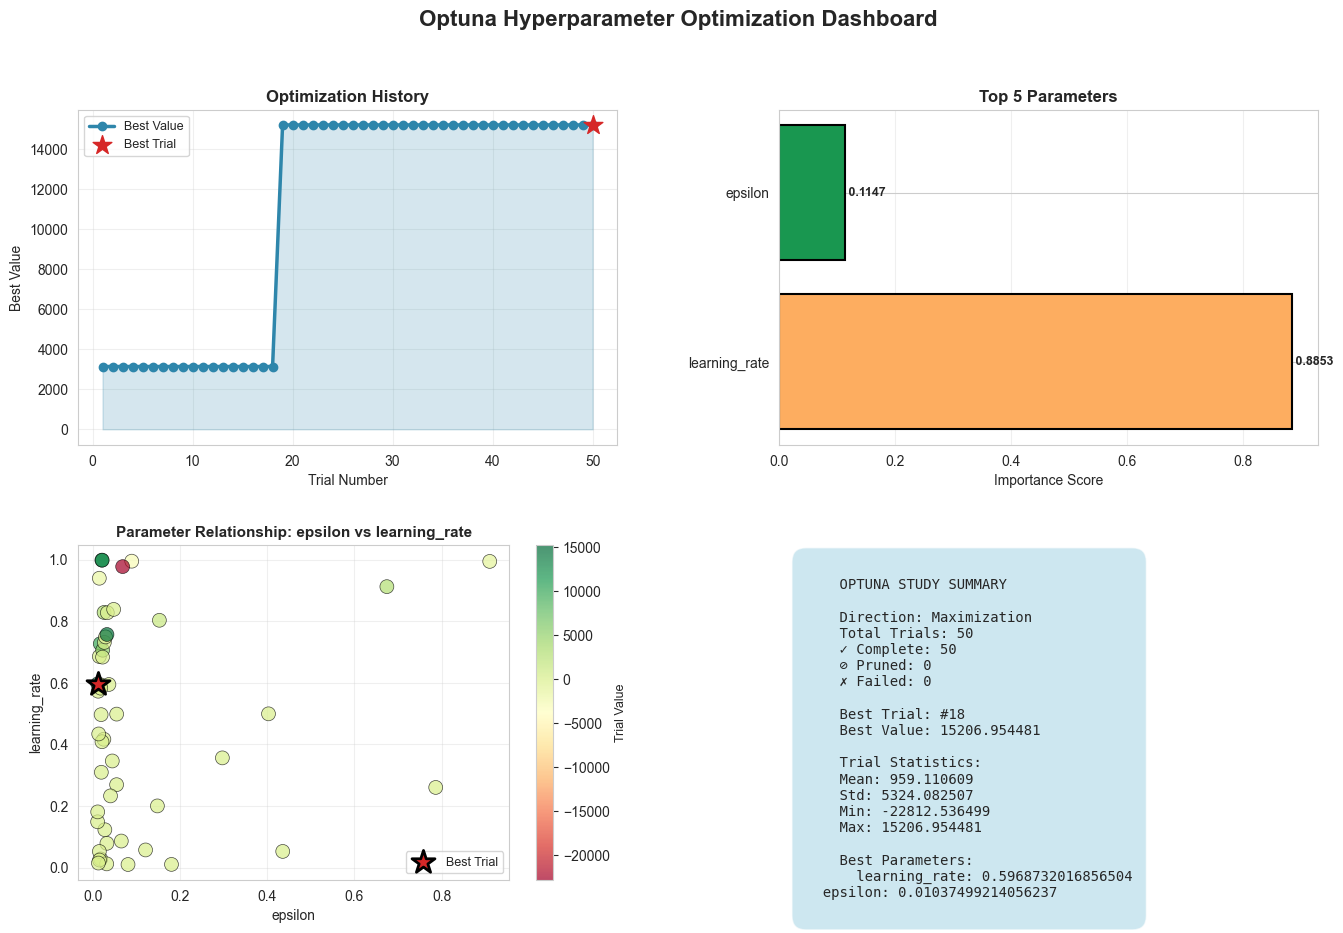

In [ ]:
create_optuna_study_dashboard(study)

In [10]:
# We train the agent with specified parameters
TRAIN_CONFIG["learning_rate"] = study.best_params["learning_rate"]
TRAIN_CONFIG["epsilon"] = study.best_params["epsilon"]
agent.train(**TRAIN_CONFIG)


0 -116122.54657871247
5 -6524.408709272782
mean reward -0.37 min reward -183.94 max reward 124.74 max total reward 18949.42
10 -6183.392725960218
mean reward -0.35 min reward -183.94 max reward 144.42 max total reward 18949.42
15 -7415.108535332078
mean reward -0.42 min reward -330.32 max reward 209.39 max total reward 18949.42
20 -7239.494679841117
mean reward -0.41 min reward -240.0 max reward 136.37 max total reward 18949.42
25 -7616.925657535646
mean reward -0.43 min reward -239.12 max reward 142.24 max total reward 18949.42
30 -7277.742428939291
mean reward -0.42 min reward -220.73 max reward 150.46 max total reward 18949.42
35 -7190.33673051478
mean reward -0.41 min reward -172.72 max reward 119.44 max total reward 18949.42
40 -7684.860452383445
mean reward -0.44 min reward -285.08 max reward 174.54 max total reward 18949.42
45 -4632.282190572782
mean reward -0.26 min reward -208.97 max reward 132.42 max total reward 18949.42


In [11]:
# We replace the environment with the validation environment and let the agent play once
agent.env = validate_env
agent.env.reset()
water_levels, rewards, action_history = agent.play()


Total reward in evaluation: 23.87
avg reward 0.0
max 28.155703524544805 min -47.823788259000004


### Model performance
We visualize the performance of the model using multiple visualizations. 
Specifically, we have functions for the water level:
- `plot_water_levels()`: Simple time series of water level
- `plot_daily_statistics()`: Water level time series with min, max and range

Functions for the actions:
- `plot_actions_over_time()`: Simple time series of actions
- `plot_action_distribution()`: Distribution of actions performed

Functions for the rewards:
- `plot_cumulative_rewards()`: Simple time series of rewards over time from test simulation
- `plot_reward_distribution()`: Distribution of rewards from test simulation

Functions for the Qtable:
- `plot_state_heatmap()`: Heatmap of Qtable

Functions for learning curve for training:
- `plot_learning_curve()`: learning curve through training

If you want to summarize the results in a single plot, you can use:
- `create_performance_dashboard()`: Action and environment summary
- `plot_learning_curve_with_phases()`: Learning summary



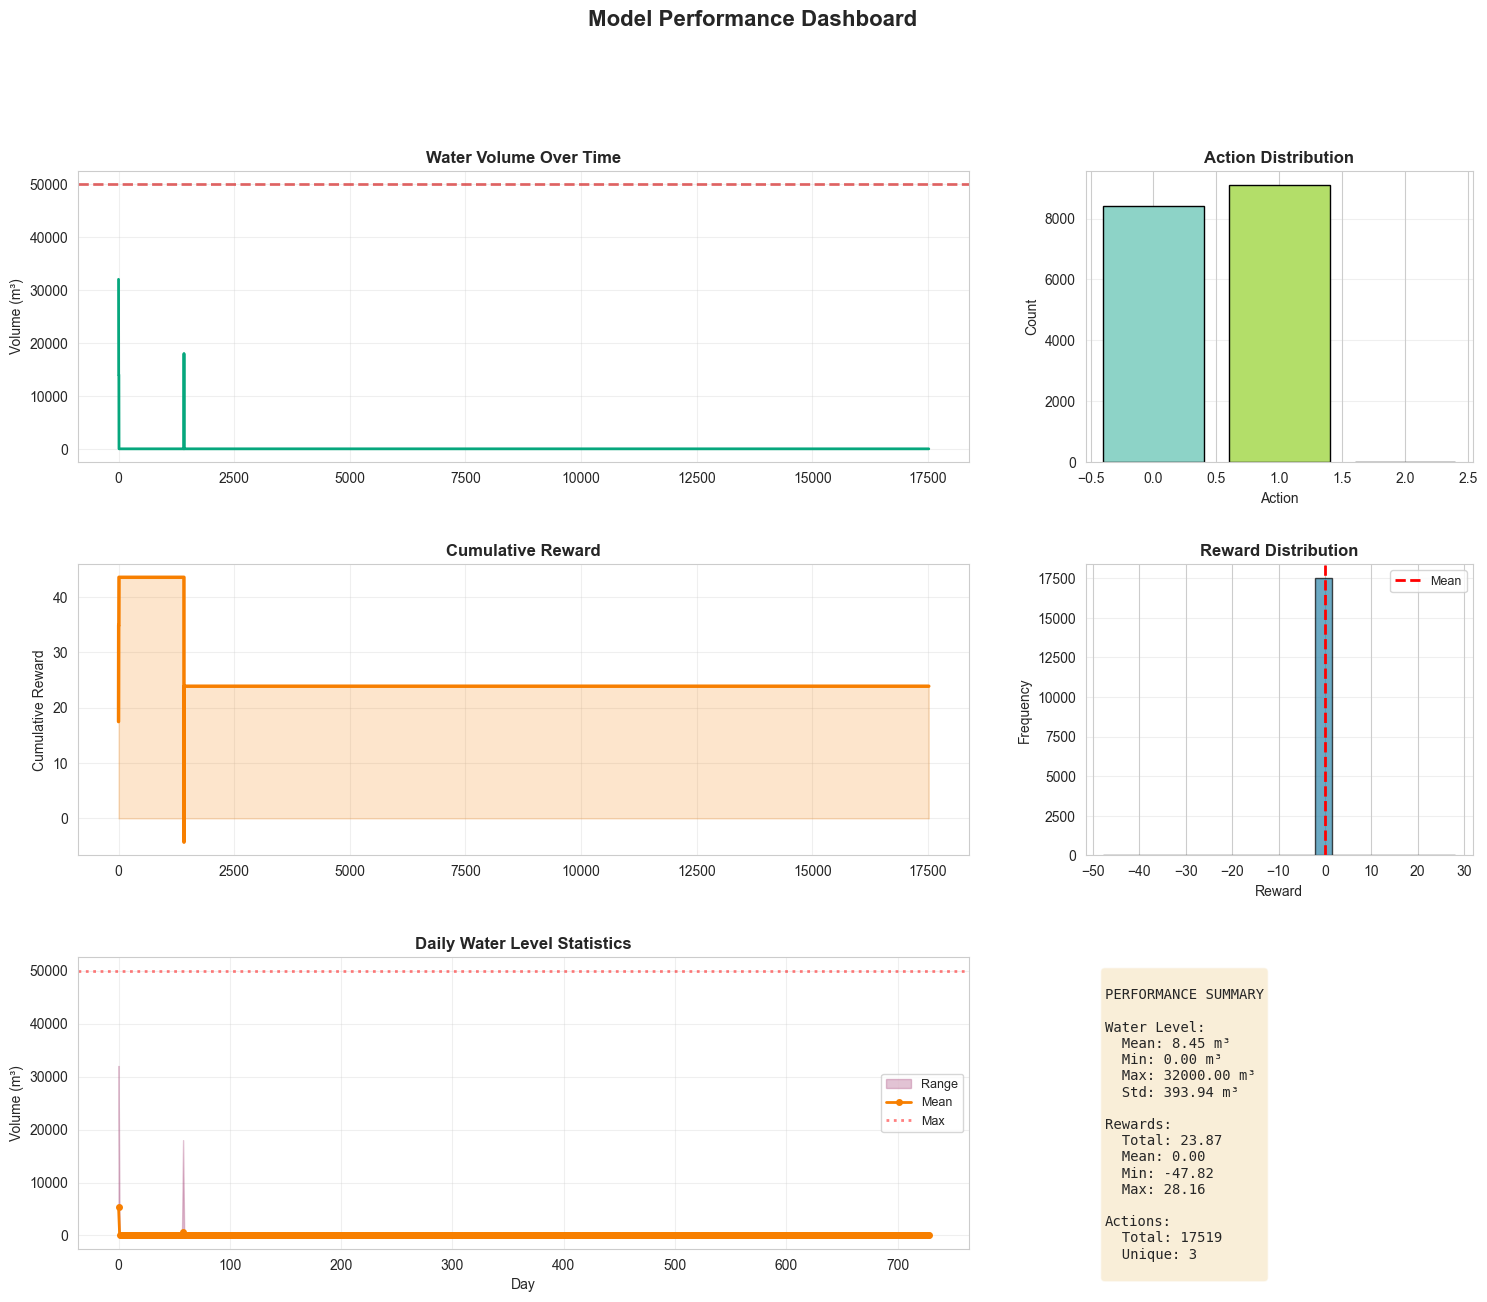

In [12]:
create_performance_dashboard(water_levels, rewards, action_history, max_volume = 50000)

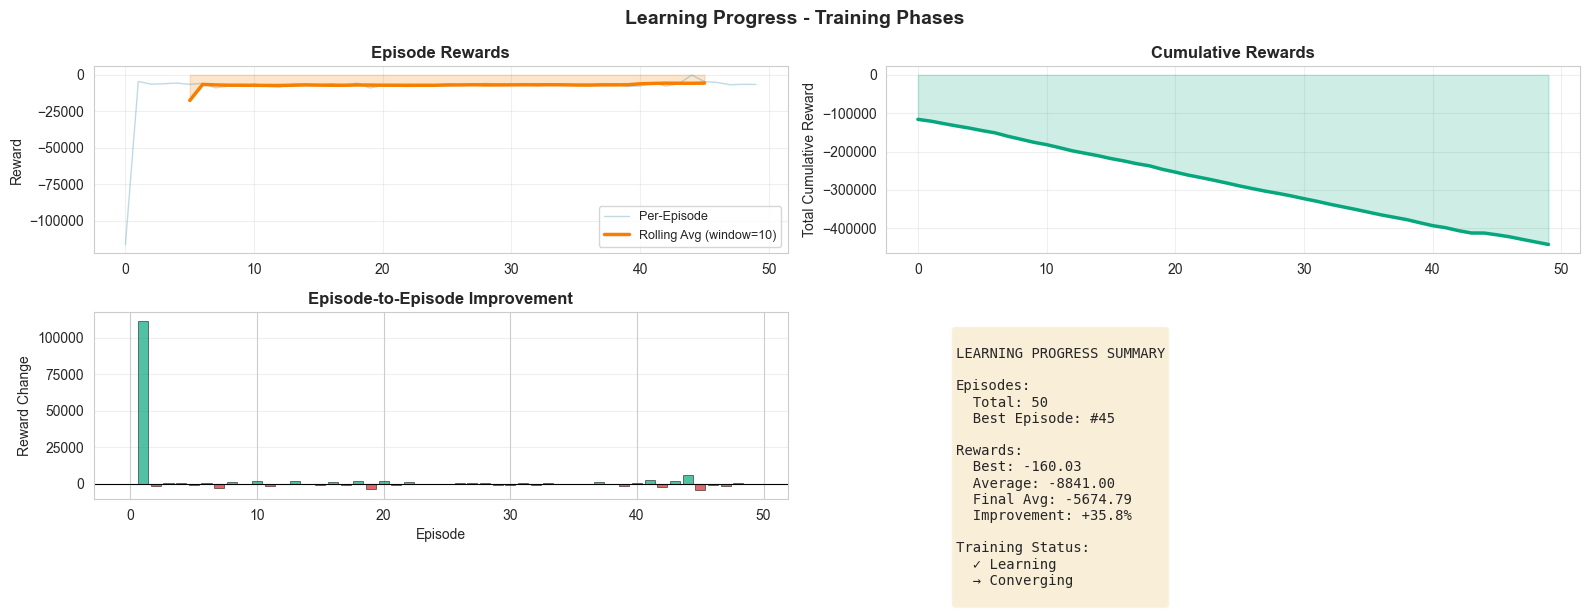

In [13]:
import pandas as pd
plot_learning_curve_with_phases(agent.train_curve)

### Experiment 2: 3 bins / reward shaping

In [ ]:
TRAIN_CONFIG = {
    "learning_rate": 0.1,
    "simulations" : 50,
    "epsilon": 0.6,
    "epsilon_decay": 0.995,
    "adaptive_epsilon" : True,
    "adaptive_learning_rate" : True,
    "use_reward_shaping": True,
}

parameter_dict = {
    'learning_rate': (0.01, 1.0),
    'epsilon': (0.01, 1.0),
    
}

#We initialize the environment and the agent
env = HydroElectric_Test("data/train.xlsx")
validate_env = HydroElectric_Test("data/validate.xlsx")

#We select one of the wrappers
env = number_of_actions_env_wrapper(env,3)
validate_env = number_of_actions_env_wrapper(validate_env, 3)

env.reset(seed=SEED)
agent = QAgent(env, **AGENT_CONFIG)

In [19]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)
print("Best hyperparameters: ", study.best_params)

[I 2026-01-27 19:40:54,210] A new study created in memory with name: no-name-59acd303-4753-4a84-8445-32aa1f3ddba8


0 -883923.6833481973
5 -531815.8448333002
mean reward -20.22 min reward -643.14 max reward 3311.78 max total reward -531815.84
10 -202065.2686270967
mean reward -7.68 min reward -4595.74 max reward 1259.03 max total reward -202065.27
15 -119091.15304838847
mean reward -4.53 min reward -458.06 max reward 663.08 max total reward -111509.85
20 -55670.108323061424
mean reward -2.12 min reward -1744.71 max reward 3311.78 max total reward -55670.11
25 -19265.430266930143
mean reward -0.73 min reward -916.99 max reward 3311.78 max total reward -19265.43


[I 2026-01-27 19:41:57,683] Trial 0 finished with value: -4237.080220161465 and parameters: {'learning_rate': 0.010361209997727567, 'epsilon': 0.11018738577193214}. Best is trial 0 with value: -4237.080220161465.


Total reward in evaluation: -4237.08
avg reward -0.24
max 158.9221271376 min -123.440555002365
0 -886037.9207011957
5 -829.047391559432
mean reward -0.03 min reward -916.99 max reward 663.08 max total reward -829.05
10 14877.106739347219
mean reward 0.57 min reward -1744.71 max reward 663.08 max total reward 21350.12
15 19790.718728560285
mean reward 0.75 min reward -1744.71 max reward 663.08 max total reward 22279.22
20 19300.868227737985
mean reward 0.73 min reward -397.88 max reward 663.08 max total reward 22279.22
25 16223.012137739508
mean reward 0.62 min reward -365.18 max reward 2234.22 max total reward 22279.22


[I 2026-01-27 19:43:01,020] Trial 1 finished with value: -886.9878008396739 and parameters: {'learning_rate': 0.09045172037421209, 'epsilon': 0.13148894708555608}. Best is trial 1 with value: -886.9878008396739.


Total reward in evaluation: -886.99
avg reward -0.05
max 99.23362488683641 min -139.921368187005
0 -877786.0382554741
5 2370.8760360075903
mean reward 0.09 min reward -916.99 max reward 663.98 max total reward 24591.31
10 15293.52316899017
mean reward 0.58 min reward -883.01 max reward 663.08 max total reward 24591.31
15 20586.308806468438
mean reward 0.78 min reward -352.67 max reward 663.08 max total reward 24591.31
20 22149.030856154946
mean reward 0.84 min reward -328.39 max reward 663.08 max total reward 24591.31
25 18099.30015167667
mean reward 0.69 min reward -550.01 max reward 331.99 max total reward 25930.43


[I 2026-01-27 19:44:04,426] Trial 2 finished with value: -840.2897109812304 and parameters: {'learning_rate': 0.08331244325056207, 'epsilon': 0.6489439887233021}. Best is trial 2 with value: -840.2897109812304.


Total reward in evaluation: -840.29
avg reward -0.05
max 99.23362488683641 min -103.354563933585
0 -895554.7171560305
5 -91221.05269091106
mean reward -3.47 min reward -1744.71 max reward 663.08 max total reward 25930.43
10 -2956.252954680871
mean reward -0.11 min reward -1744.71 max reward 663.08 max total reward 25930.43
15 5298.864205164119
mean reward 0.2 min reward -460.8 max reward 1413.74 max total reward 25930.43
20 17881.908253010373
mean reward 0.68 min reward -415.08 max reward 1019.95 max total reward 25930.43
25 19250.344545005497
mean reward 0.73 min reward -640.14 max reward 1060.38 max total reward 25930.43


[I 2026-01-27 19:45:07,691] Trial 3 finished with value: -3553.603975130909 and parameters: {'learning_rate': 0.03381244289895416, 'epsilon': 0.09367566857614847}. Best is trial 2 with value: -840.2897109812304.


Total reward in evaluation: -3553.6
avg reward -0.2
max 158.9221271376 min -139.921368187005
0 -892162.9318283548
5 8409.026695042492
mean reward 0.32 min reward -383.75 max reward 2336.02 max total reward 25930.43
10 17259.225917463118
mean reward 0.66 min reward -457.16 max reward 370.5 max total reward 25930.43
15 20601.328839314847
mean reward 0.78 min reward -366.08 max reward 663.08 max total reward 25930.43
20 29483.015666030315
mean reward 1.12 min reward -457.53 max reward 530.64 max total reward 29483.02
25 24656.69115668219
mean reward 0.94 min reward -1744.71 max reward 1259.93 max total reward 29483.02


[I 2026-01-27 19:46:13,894] Trial 4 finished with value: -604.5441861349583 and parameters: {'learning_rate': 0.1810508656192654, 'epsilon': 0.08864467793490226}. Best is trial 4 with value: -604.5441861349583.


Total reward in evaluation: -604.54
avg reward -0.03
max 158.9221271376 min -183.93764715
0 -903682.9298384963
5 45538.72407532763
mean reward 1.73 min reward -550.07 max reward 663.98 max total reward 45538.72
10 58967.90712147845
mean reward 2.24 min reward -4595.74 max reward 1060.88 max total reward 62839.1
15 62536.67027581151
mean reward 2.38 min reward -457.69 max reward 1060.88 max total reward 62839.1
20 62664.892443876015
mean reward 2.38 min reward -365.58 max reward 1259.53 max total reward 67783.77
25 73123.7962690482
mean reward 2.78 min reward -549.17 max reward 3311.78 max total reward 77808.89


[I 2026-01-27 19:47:19,773] Trial 5 finished with value: 12707.127078943518 and parameters: {'learning_rate': 0.5187950573312984, 'epsilon': 0.05169265540511775}. Best is trial 5 with value: 12707.127078943518.


Total reward in evaluation: 12707.13
avg reward 0.73
max 158.9221271376 min -183.93764715
0 -886163.5509479698
5 7808.610352662045
mean reward 0.3 min reward -366.08 max reward 663.08 max total reward 77808.89
10 15228.951221131507
mean reward 0.58 min reward -434.52 max reward 663.08 max total reward 77808.89
15 11174.76908965765
mean reward 0.42 min reward -917.89 max reward 663.08 max total reward 77808.89
20 16528.96350424861
mean reward 0.63 min reward -1744.71 max reward 663.08 max total reward 77808.89
25 18612.32377287663
mean reward 0.71 min reward -917.89 max reward 1019.95 max total reward 77808.89


[I 2026-01-27 19:48:23,488] Trial 6 finished with value: -2604.089882020242 and parameters: {'learning_rate': 0.1327611089576777, 'epsilon': 0.3022027236457161}. Best is trial 5 with value: 12707.127078943518.


Total reward in evaluation: -2604.09
avg reward -0.15
max 99.23362488683641 min -139.921368187005
0 -876244.516082861
5 55139.64872170388
mean reward 2.1 min reward -917.89 max reward 1413.74 max total reward 77808.89
10 46147.68148162815
mean reward 1.75 min reward -4597.54 max reward 1259.53 max total reward 77808.89
15 60626.580306458716
mean reward 2.3 min reward -916.99 max reward 1259.93 max total reward 77808.89
20 78195.80712215512
mean reward 2.97 min reward -328.39 max reward 1259.93 max total reward 78195.81
25 76320.73239734987
mean reward 2.9 min reward -365.18 max reward 1259.93 max total reward 78195.81


[I 2026-01-27 19:49:27,183] Trial 7 finished with value: 23521.488680675888 and parameters: {'learning_rate': 0.38642374108173644, 'epsilon': 0.3197182095670745}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 23521.49
avg reward 1.34
max 134.0110837087812 min -139.921368187005
0 -853949.8446072884
5 -58359.01986150872
mean reward -2.22 min reward -415.08 max reward 1259.03 max total reward 78195.81
10 6720.113990126596
mean reward 0.26 min reward -917.89 max reward 663.08 max total reward 78195.81
15 18948.86266795376
mean reward 0.72 min reward -366.06 max reward 663.08 max total reward 78195.81
20 14289.458599107382
mean reward 0.54 min reward -382.8 max reward 663.08 max total reward 78195.81
25 18591.26273759536
mean reward 0.71 min reward -916.99 max reward 663.98 max total reward 78195.81


[I 2026-01-27 19:50:30,380] Trial 8 finished with value: -2507.722005675997 and parameters: {'learning_rate': 0.051868717777582084, 'epsilon': 0.026127369886784463}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: -2507.72
avg reward -0.14
max 158.9221271376 min -183.93764715
0 -879175.8625435398
5 -111042.49182323452
mean reward -4.22 min reward -917.89 max reward 3311.78 max total reward 78195.81
10 -11499.0431026132
mean reward -0.44 min reward -851.41 max reward 3311.78 max total reward 78195.81
15 13447.427413540836
mean reward 0.51 min reward -457.16 max reward 1637.88 max total reward 78195.81
20 16776.328044818583
mean reward 0.64 min reward -366.98 max reward 1019.95 max total reward 78195.81
25 14685.720438159537
mean reward 0.56 min reward -674.15 max reward 1019.95 max total reward 78195.81


[I 2026-01-27 19:51:33,450] Trial 9 finished with value: -1420.9499615090592 and parameters: {'learning_rate': 0.029212912622355626, 'epsilon': 0.02208039607831079}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: -1420.95
avg reward -0.08
max 158.9221271376 min -119.577864412215
0 -876315.49851973
5 13432.069216311333
mean reward 0.51 min reward -4596.14 max reward 663.58 max total reward 78195.81
10 38159.16636092462
mean reward 1.45 min reward -361.83 max reward 1259.03 max total reward 78195.81
15 65950.50941117099
mean reward 2.51 min reward -1468.3 max reward 1260.43 max total reward 78195.81
20 63603.147713248705
mean reward 2.42 min reward -918.79 max reward 1259.53 max total reward 78195.81
25 70224.13149834856
mean reward 2.67 min reward -482.64 max reward 1739.38 max total reward 78195.81


[I 2026-01-27 19:52:41,153] Trial 10 finished with value: 15197.821608747536 and parameters: {'learning_rate': 0.7939937143266964, 'epsilon': 0.853951175453292}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 15197.82
avg reward 0.87
max 132.435105948 min -132.30634959499503
0 -902876.7305306442
5 48518.0460838946
mean reward 1.84 min reward -466.93 max reward 3312.28 max total reward 78195.81
10 47961.992992954445
mean reward 1.82 min reward -883.91 max reward 1259.93 max total reward 78195.81
15 67108.14515845322
mean reward 2.55 min reward -915.19 max reward 1259.93 max total reward 78195.81
20 61464.13825507721
mean reward 2.34 min reward -918.79 max reward 1259.53 max total reward 78195.81
25 76396.81521410981
mean reward 2.9 min reward -916.09 max reward 1259.93 max total reward 78195.81


[I 2026-01-27 19:53:49,916] Trial 11 finished with value: 13039.954893955597 and parameters: {'learning_rate': 0.8839382127230397, 'epsilon': 0.964656100502743}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 13039.95
avg reward 0.74
max 150.7906116323928 min -139.921368187005
0 -894789.2067899314
5 48983.643495750635
mean reward 1.86 min reward -917.39 max reward 663.58 max total reward 85748.41
10 49649.46575809311
mean reward 1.89 min reward -733.95 max reward 663.08 max total reward 85748.41
15 51446.0100011956
mean reward 1.96 min reward -735.29 max reward 663.58 max total reward 85748.41
20 56403.168401874376
mean reward 2.14 min reward -734.89 max reward 1259.03 max total reward 85748.41
25 59189.573396771215
mean reward 2.25 min reward -279.55 max reward 2335.12 max total reward 85748.41


[I 2026-01-27 19:54:58,250] Trial 12 finished with value: 11449.446794800118 and parameters: {'learning_rate': 0.32377272145549646, 'epsilon': 0.377708312819282}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 11449.45
avg reward 0.65
max 134.0110837087812 min -139.921368187005
0 -886937.2516245678
5 -15883.743211963118
mean reward -0.6 min reward -367.28 max reward 1260.83 max total reward 85748.41
10 53344.08478523003
mean reward 2.03 min reward -1745.11 max reward 1638.78 max total reward 85748.41
15 28504.08959680733
mean reward 1.08 min reward -329.29 max reward 3311.38 max total reward 85748.41
20 62161.386511413
mean reward 2.36 min reward -1959.98 max reward 1259.53 max total reward 85748.41
25 72016.75100397687
mean reward 2.74 min reward -318.29 max reward 663.98 max total reward 85748.41


[I 2026-01-27 19:56:07,126] Trial 13 finished with value: 10550.94596875004 and parameters: {'learning_rate': 0.9146493774424129, 'epsilon': 0.2920923241456876}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 10550.95
avg reward 0.6
max 150.7906116323928 min -220.72517658
0 -916532.9772673289
5 47330.342218880105
mean reward 1.8 min reward -1468.8 max reward 1259.93 max total reward 85748.41
10 47627.90193324923
mean reward 1.81 min reward -4597.04 max reward 663.08 max total reward 85748.41
15 64586.26752807563
mean reward 2.46 min reward -414.18 max reward 663.08 max total reward 85748.41
20 65173.62501413986
mean reward 2.48 min reward -1745.61 max reward 1259.03 max total reward 85748.41
25 58626.31100463409
mean reward 2.23 min reward -366.08 max reward 1019.95 max total reward 85748.41


[I 2026-01-27 19:57:14,925] Trial 14 finished with value: 11367.783629719632 and parameters: {'learning_rate': 0.3240447849148264, 'epsilon': 0.5236296390508883}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 11367.78
avg reward 0.65
max 134.1037882829448 min -139.921368187005
0 -877649.920441698
5 51981.65594436938
mean reward 1.98 min reward -325.3 max reward 1260.83 max total reward 85748.41
10 64605.31236597647
mean reward 2.46 min reward -916.99 max reward 1260.83 max total reward 85748.41
15 65776.62161316139
mean reward 2.5 min reward -458.06 max reward 1259.93 max total reward 85748.41
20 71826.50042544023
mean reward 2.73 min reward -640.14 max reward 1259.93 max total reward 85748.41
25 60502.19936834001
mean reward 2.3 min reward -1960.48 max reward 2335.12 max total reward 85748.41


[I 2026-01-27 19:58:23,034] Trial 15 finished with value: 9370.999205793381 and parameters: {'learning_rate': 0.43074049337759335, 'epsilon': 0.8387338630137668}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 9371.0
avg reward 0.53
max 150.45952386752282 min -152.74182219336
0 -893483.1888684646
5 15424.871608071238
mean reward 0.59 min reward -434.52 max reward 663.08 max total reward 85748.41
10 27520.52911490996
mean reward 1.05 min reward -1745.61 max reward 1259.03 max total reward 85748.41
15 31455.282844831585
mean reward 1.2 min reward -458.19 max reward 1259.03 max total reward 85748.41
20 28365.485227023542
mean reward 1.08 min reward -916.99 max reward 663.08 max total reward 85748.41
25 38519.80504784088
mean reward 1.46 min reward -420.61 max reward 1019.95 max total reward 85748.41


[I 2026-01-27 19:59:30,489] Trial 16 finished with value: 1321.5846372668657 and parameters: {'learning_rate': 0.1940149517116504, 'epsilon': 0.011113715737433581}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 1321.58
avg reward 0.08
max 134.0110837087812 min -139.921368187005
0 -874848.9493093923
5 47167.1980584314
mean reward 1.79 min reward -329.29 max reward 3311.78 max total reward 85748.41
10 60960.010540321455
mean reward 2.32 min reward -457.14 max reward 3311.38 max total reward 85748.41
15 71511.43671094207
mean reward 2.72 min reward -916.49 max reward 1259.53 max total reward 85748.41
20 68050.48553361604
mean reward 2.59 min reward -2270.88 max reward 1260.43 max total reward 85748.41
25 68815.02675688769
mean reward 2.62 min reward -482.64 max reward 1259.53 max total reward 86508.91


[I 2026-01-27 20:00:38,790] Trial 17 finished with value: 9919.254057396913 and parameters: {'learning_rate': 0.7065546600475556, 'epsilon': 0.18111022118010053}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 9919.25
avg reward 0.57
max 144.420483036294 min -139.921368187005
0 -893869.9008999879
5 55755.09911731049
mean reward 2.12 min reward -694.31 max reward 663.58 max total reward 86508.91
10 65981.3708107643
mean reward 2.51 min reward -916.09 max reward 1739.38 max total reward 86508.91
15 72347.45363831961
mean reward 2.75 min reward -1960.88 max reward 1637.48 max total reward 86508.91
20 78288.60569385886
mean reward 2.98 min reward -916.99 max reward 662.68 max total reward 86508.91
25 65031.99881379419
mean reward 2.47 min reward -851.41 max reward 663.08 max total reward 86508.91


[I 2026-01-27 20:01:47,020] Trial 18 finished with value: 7995.731262579881 and parameters: {'learning_rate': 0.5123900850476373, 'epsilon': 0.2086642626661152}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 7995.73
avg reward 0.46
max 134.0110837087812 min -139.921368187005
0 -880671.5554929109
5 29246.399466498995
mean reward 1.11 min reward -916.99 max reward 3210.88 max total reward 86508.91
10 39811.41062785707
mean reward 1.51 min reward -536.37 max reward 606.43 max total reward 86508.91
15 31294.74107311604
mean reward 1.19 min reward -346.78 max reward 315.7 max total reward 86508.91
20 50502.71710899138
mean reward 1.92 min reward -383.57 max reward 664.88 max total reward 86508.91
25 53903.66669422557
mean reward 2.05 min reward -1744.71 max reward 2336.02 max total reward 86508.91


[I 2026-01-27 20:02:54,930] Trial 19 finished with value: 10711.290301775392 and parameters: {'learning_rate': 0.27734856272821673, 'epsilon': 0.47354332065376553}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 10711.29
avg reward 0.61
max 144.420483036294 min -115.95429276336
0 -900729.034592544
5 62087.644686035375
mean reward 2.36 min reward -955.09 max reward 663.98 max total reward 86508.91
10 62622.563889859885
mean reward 2.38 min reward -4596.64 max reward 1259.93 max total reward 86508.91
15 61598.20333355342
mean reward 2.34 min reward -916.99 max reward 1259.93 max total reward 86508.91
20 69094.30302419198
mean reward 2.63 min reward -916.99 max reward 1061.28 max total reward 86508.91
25 72188.01769603942
mean reward 2.74 min reward -916.99 max reward 1259.73 max total reward 86508.91


[I 2026-01-27 20:04:03,021] Trial 20 finished with value: 12941.810915690425 and parameters: {'learning_rate': 0.603454751074197, 'epsilon': 0.6348185865125869}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 12941.81
avg reward 0.74
max 280.13997961180445 min -139.921368187005
0 -888297.2611523976
5 -24668.115053520556
mean reward -0.94 min reward -2270.88 max reward 1260.43 max total reward 86508.91
10 40235.05356215374
mean reward 1.53 min reward -954.19 max reward 1259.53 max total reward 86508.91
15 70051.25873151973
mean reward 2.66 min reward -4595.74 max reward 2335.12 max total reward 86508.91
20 77228.68068614285
mean reward 2.94 min reward -1411.75 max reward 3311.78 max total reward 86508.91
25 80513.0394436301
mean reward 3.06 min reward -421.51 max reward 1259.53 max total reward 86508.91


[I 2026-01-27 20:05:11,543] Trial 21 finished with value: 14529.604830924554 and parameters: {'learning_rate': 0.8942602827588358, 'epsilon': 0.9814778810153915}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 14529.6
avg reward 0.83
max 280.13997961180445 min -169.204241613285
0 -876759.5240284427
5 -582.2931530248123
mean reward -0.02 min reward -917.01 max reward 3311.78 max total reward 88372.66
10 53470.031334178035
mean reward 2.03 min reward -329.69 max reward 2335.12 max total reward 88372.66
15 50932.99185745915
mean reward 1.94 min reward -883.91 max reward 1260.43 max total reward 88372.66
20 72548.85761554995
mean reward 2.76 min reward -1413.95 max reward 663.58 max total reward 88372.66
25 64176.766022077834
mean reward 2.44 min reward -695.71 max reward 1259.53 max total reward 88372.66


[I 2026-01-27 20:06:22,520] Trial 22 finished with value: 13815.29401447634 and parameters: {'learning_rate': 0.8490821792143781, 'epsilon': 0.9568863369906804}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 13815.29
avg reward 0.79
max 209.39314601438284 min -220.72517658
0 -878082.3945756578
5 81527.72025259184
mean reward 3.1 min reward -458.06 max reward 1061.08 max total reward 88372.66
10 60645.358178652226
mean reward 2.31 min reward -366.08 max reward 1061.28 max total reward 88372.66
15 76950.41449868014
mean reward 2.93 min reward -457.69 max reward 1260.43 max total reward 88372.66
20 76617.61566351085
mean reward 2.91 min reward -549.11 max reward 663.98 max total reward 88372.66
25 70405.56213967662
mean reward 2.68 min reward -414.52 max reward 3311.38 max total reward 88372.66


[I 2026-01-27 20:07:32,835] Trial 23 finished with value: 9347.686212643013 and parameters: {'learning_rate': 0.4003747330776273, 'epsilon': 0.4006417179923739}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 9347.69
avg reward 0.53
max 132.39537541621561 min -139.921368187005
0 -903520.8863072282
5 -25326.448637618392
mean reward -0.96 min reward -1413.05 max reward 2335.62 max total reward 88372.66
10 20779.818455063338
mean reward 0.79 min reward -954.69 max reward 1259.93 max total reward 88372.66
15 38349.38676253176
mean reward 1.46 min reward -482.64 max reward 3311.78 max total reward 88372.66
20 50951.64303075347
mean reward 1.94 min reward -4597.04 max reward 1258.63 max total reward 88372.66
25 68876.1860969877
mean reward 2.62 min reward -916.09 max reward 1019.95 max total reward 88372.66


[I 2026-01-27 20:08:43,216] Trial 24 finished with value: 15093.007315646222 and parameters: {'learning_rate': 0.9955862878303952, 'epsilon': 0.6052801820383653}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 15093.01
avg reward 0.86
max 150.45952386752282 min -130.503760652925
0 -860966.4821990934
5 23284.563584397492
mean reward 0.89 min reward -397.88 max reward 663.08 max total reward 88372.66
10 30454.87723660647
mean reward 1.16 min reward -366.08 max reward 663.98 max total reward 88372.66
15 30736.417950227573
mean reward 1.17 min reward -352.83 max reward 663.08 max total reward 88372.66
20 31772.141671198697
mean reward 1.21 min reward -550.01 max reward 663.08 max total reward 88372.66
25 33365.98273050127
mean reward 1.27 min reward -837.47 max reward 663.08 max total reward 88372.66


[I 2026-01-27 20:09:52,937] Trial 25 finished with value: -3529.2064856129255 and parameters: {'learning_rate': 0.2308707074717155, 'epsilon': 0.26883868926726884}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: -3529.21
avg reward -0.2
max 144.420483036294 min -139.921368187005
0 -878871.5892518249
5 40400.83026558443
mean reward 1.54 min reward -788.29 max reward 1259.53 max total reward 88372.66
10 50857.57356608206
mean reward 1.93 min reward -4595.74 max reward 2336.02 max total reward 88372.66
15 83541.01086050941
mean reward 3.18 min reward -642.38 max reward 1258.63 max total reward 88372.66
20 78209.75936162054
mean reward 2.97 min reward -641.48 max reward 1259.53 max total reward 88372.66
25 63405.58299316555
mean reward 2.41 min reward -918.29 max reward 1259.03 max total reward 88372.66


[I 2026-01-27 20:11:03,248] Trial 26 finished with value: 14551.288136521205 and parameters: {'learning_rate': 0.5744563213002746, 'epsilon': 0.6120935594457423}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 14551.29
avg reward 0.83
max 280.13997961180445 min -183.93764715
0 -884089.0911781152
5 3962.6071868627037
mean reward 0.15 min reward -953.79 max reward 1259.93 max total reward 88372.66
10 18724.094416550324
mean reward 0.71 min reward -510.63 max reward 663.08 max total reward 88372.66
15 19764.87694750058
mean reward 0.75 min reward -1744.71 max reward 3210.88 max total reward 88372.66
20 19360.503621645315
mean reward 0.74 min reward -916.99 max reward 663.98 max total reward 88372.66
25 19793.81512949303
mean reward 0.75 min reward -1744.71 max reward 663.08 max total reward 88372.66


[I 2026-01-27 20:12:12,838] Trial 27 finished with value: -520.4743808791723 and parameters: {'learning_rate': 0.13667103937738667, 'epsilon': 0.21755997766635182}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: -520.47
avg reward -0.03
max 158.9221271376 min -183.93764715
0 -851661.9934299684
5 55828.80610971578
mean reward 2.12 min reward -328.39 max reward 662.68 max total reward 88372.66
10 63923.59540372727
mean reward 2.43 min reward -917.01 max reward 1536.98 max total reward 88372.66
15 61884.76360375943
mean reward 2.35 min reward -918.31 max reward 2234.22 max total reward 88372.66
20 76761.77636653514
mean reward 2.92 min reward -414.12 max reward 1259.93 max total reward 88372.66
25 74550.48329448019
mean reward 2.83 min reward -736.19 max reward 2234.22 max total reward 88372.66


[I 2026-01-27 20:13:22,680] Trial 28 finished with value: 16505.72128506644 and parameters: {'learning_rate': 0.4012385814096525, 'epsilon': 0.36684664515783066}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 16505.72
avg reward 0.94
max 134.0110837087812 min -137.530178774055
0 -866876.1007852263
5 62615.66485609163
mean reward 2.38 min reward -551.23 max reward 663.98 max total reward 88372.66
10 70311.89506803174
mean reward 2.67 min reward -314.59 max reward 663.98 max total reward 88372.66
15 65488.67918664108
mean reward 2.49 min reward -917.01 max reward 1020.85 max total reward 88372.66
20 59365.89291203158
mean reward 2.26 min reward -309.99 max reward 663.98 max total reward 88372.66
25 72466.8183840754
mean reward 2.76 min reward -1468.3 max reward 1260.43 max total reward 88372.66


[I 2026-01-27 20:14:32,461] Trial 29 finished with value: 12775.602650473984 and parameters: {'learning_rate': 0.40148262042514155, 'epsilon': 0.15661818788922183}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 12775.6
avg reward 0.73
max 158.9221271376 min -169.204241613285
0 -879141.5800909132
5 -384205.19770330936
mean reward -14.61 min reward -459.09 max reward 3311.78 max total reward 88372.66
10 -111064.9002816053
mean reward -4.22 min reward -673.25 max reward 3311.78 max total reward 88372.66
15 -57427.525717918266
mean reward -2.18 min reward -1412.65 max reward 3311.78 max total reward 88372.66
20 -17652.06557517919
mean reward -0.67 min reward -297.58 max reward 3311.78 max total reward 88372.66
25 3869.875878921007
mean reward 0.15 min reward -3239.27 max reward 3311.78 max total reward 88372.66


[I 2026-01-27 20:15:42,218] Trial 30 finished with value: -1225.1799733931946 and parameters: {'learning_rate': 0.013449394923422174, 'epsilon': 0.06497927607252453}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: -1225.18
avg reward -0.07
max 158.9221271376 min -183.93764715
0 -901974.4889286113
5 46146.18653816022
mean reward 1.75 min reward -916.99 max reward 3210.88 max total reward 88372.66
10 59169.950824769796
mean reward 2.25 min reward -917.89 max reward 1637.88 max total reward 88372.66
15 47713.996973812085
mean reward 1.81 min reward -883.01 max reward 1259.93 max total reward 88372.66
20 63374.283579622075
mean reward 2.41 min reward -366.08 max reward 1259.53 max total reward 88372.66
25 65306.31694391266
mean reward 2.48 min reward -457.16 max reward 1259.53 max total reward 88372.66


[I 2026-01-27 20:16:51,952] Trial 31 finished with value: 19317.985910126365 and parameters: {'learning_rate': 0.6186886998712317, 'epsilon': 0.44127500460267}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 19317.99
avg reward 1.1
max 158.9221271376 min -220.72517658
0 -873900.1601001854
5 38852.914910380554
mean reward 1.48 min reward -1746.01 max reward 1259.53 max total reward 88372.66
10 59585.621248858675
mean reward 2.27 min reward -511.53 max reward 1259.93 max total reward 88372.66
15 64146.62988458343
mean reward 2.44 min reward -322.37 max reward 1259.53 max total reward 88372.66
20 67122.40046507357
mean reward 2.55 min reward -916.99 max reward 1413.34 max total reward 88372.66
25 72067.26798598311
mean reward 2.74 min reward -463.84 max reward 1260.43 max total reward 88372.66


[I 2026-01-27 20:18:02,306] Trial 32 finished with value: 21526.23167497159 and parameters: {'learning_rate': 0.6871228958558924, 'epsilon': 0.3812060307314725}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 21526.23
avg reward 1.23
max 150.45952386752282 min -132.379924653855
0 -864412.3083399296
5 23090.42159816246
mean reward 0.88 min reward -1745.61 max reward 1259.93 max total reward 88372.66
10 35588.564485285846
mean reward 1.35 min reward -466.93 max reward 400.63 max total reward 88372.66
15 35673.69574332865
mean reward 1.36 min reward -787.39 max reward 616.76 max total reward 88372.66
20 36843.874370303056
mean reward 1.4 min reward -641.08 max reward 690.48 max total reward 88372.66
25 41435.83696733624
mean reward 1.58 min reward -3239.27 max reward 1414.64 max total reward 88372.66


[I 2026-01-27 20:19:11,990] Trial 33 finished with value: 153.91313713041342 and parameters: {'learning_rate': 0.24213572080089335, 'epsilon': 0.36913443104755683}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 153.91
avg reward 0.01
max 186.73349938668002 min -139.921368187005
0 -855995.2890695103
5 36130.70831535528
mean reward 1.37 min reward -4596.64 max reward 1259.93 max total reward 88372.66
10 59959.96180607572
mean reward 2.28 min reward -1961.38 max reward 1259.93 max total reward 88372.66
15 65513.9421963765
mean reward 2.49 min reward -917.39 max reward 1259.53 max total reward 88372.66
20 68734.44059419225
mean reward 2.61 min reward -917.39 max reward 663.08 max total reward 88372.66
25 81533.13611533768
mean reward 3.1 min reward -328.39 max reward 1260.43 max total reward 88372.66


[I 2026-01-27 20:20:22,146] Trial 34 finished with value: 11743.049538682148 and parameters: {'learning_rate': 0.6218995568937057, 'epsilon': 0.1414474014151157}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 11743.05
avg reward 0.67
max 189.7530198022944 min -183.882465855855
0 -871402.0138371724
5 47263.102092327856
mean reward 1.8 min reward -382.8 max reward 663.08 max total reward 88372.66
10 59570.0655495082
mean reward 2.26 min reward -4596.64 max reward 1259.93 max total reward 88372.66
15 56523.40685406716
mean reward 2.15 min reward -342.32 max reward 663.08 max total reward 88372.66
20 63236.62622727155
mean reward 2.4 min reward -549.11 max reward 663.08 max total reward 88372.66
25 59440.56462014529
mean reward 2.26 min reward -383.57 max reward 663.08 max total reward 88372.66


[I 2026-01-27 20:21:32,131] Trial 35 finished with value: 8096.149445914363 and parameters: {'learning_rate': 0.3636894325550222, 'epsilon': 0.24473261269490043}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 8096.15
avg reward 0.46
max 144.420483036294 min -139.921368187005
0 -903879.007330055
5 10406.687363463028
mean reward 0.4 min reward -640.14 max reward 663.08 max total reward 88372.66
10 16072.394834606122
mean reward 0.61 min reward -917.89 max reward 663.08 max total reward 88372.66
15 19631.533654458402
mean reward 0.75 min reward -293.4 max reward 663.08 max total reward 88372.66
20 18715.141331978157
mean reward 0.71 min reward -2270.88 max reward 663.99 max total reward 88372.66
25 20497.70404246666
mean reward 0.78 min reward -2271.78 max reward 1259.03 max total reward 88372.66


[I 2026-01-27 20:22:41,639] Trial 36 finished with value: -506.42743064161994 and parameters: {'learning_rate': 0.15035136338463725, 'epsilon': 0.45626258921868607}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: -506.43
avg reward -0.03
max 158.9221271376 min -183.93764715
0 -872747.3291387103
5 -17407.294670448624
mean reward -0.66 min reward -674.15 max reward 638.61 max total reward 88372.66
10 12480.303427836161
mean reward 0.47 min reward -444.1 max reward 562.18 max total reward 88372.66
15 21211.23335583883
mean reward 0.81 min reward -444.8 max reward 663.08 max total reward 88372.66
20 19243.046695643734
mean reward 0.73 min reward -1744.71 max reward 465.32 max total reward 88372.66
25 20732.583645149345
mean reward 0.79 min reward -267.08 max reward 265.77 max total reward 88372.66


[I 2026-01-27 20:23:50,985] Trial 37 finished with value: -2422.1380257088695 and parameters: {'learning_rate': 0.07742262956999338, 'epsilon': 0.11284100652083622}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: -2422.14
avg reward -0.14
max 99.23362488683641 min -97.836434519085
0 -883463.2461646685
5 64769.72257426053
mean reward 2.46 min reward -1744.71 max reward 1259.93 max total reward 88372.66
10 50231.695767464014
mean reward 1.91 min reward -320.09 max reward 605.13 max total reward 88372.66
15 69604.2206575501
mean reward 2.65 min reward -456.24 max reward 1259.93 max total reward 88372.66
20 68886.43158098208
mean reward 2.62 min reward -458.03 max reward 3311.38 max total reward 88372.66
25 62836.13886553896
mean reward 2.39 min reward -733.05 max reward 1259.93 max total reward 88372.66


[I 2026-01-27 20:24:56,504] Trial 38 finished with value: 21307.538641517203 and parameters: {'learning_rate': 0.47217897663141745, 'epsilon': 0.3343798440200311}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 21307.54
avg reward 1.22
max 205.26117070880522 min -139.921368187005
0 -907207.6233437174
5 38009.002321315405
mean reward 1.45 min reward -4596.64 max reward 1259.93 max total reward 88372.66
10 69598.47135950938
mean reward 2.65 min reward -364.26 max reward 3311.78 max total reward 88372.66
15 69644.88252379234
mean reward 2.65 min reward -414.18 max reward 663.08 max total reward 88372.66
20 70090.86041286922
mean reward 2.66 min reward -341.43 max reward 663.98 max total reward 88372.66
25 71916.65810420517
mean reward 2.73 min reward -917.01 max reward 1259.53 max total reward 88372.66


[I 2026-01-27 20:26:00,008] Trial 39 finished with value: 17171.772013156577 and parameters: {'learning_rate': 0.504845322163955, 'epsilon': 0.3070416618345049}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 17171.77
avg reward 0.98
max 150.45952386752282 min -147.15011772
0 -887529.6310740671
5 33798.49746826994
mean reward 1.28 min reward -366.48 max reward 663.08 max total reward 88372.66
10 46620.07841170073
mean reward 1.77 min reward -299.03 max reward 663.08 max total reward 88372.66
15 51333.626677049324
mean reward 1.95 min reward -549.11 max reward 3311.78 max total reward 88372.66
20 57572.99919520416
mean reward 2.19 min reward -917.89 max reward 1060.88 max total reward 88372.66
25 58443.16742080243
mean reward 2.22 min reward -1959.58 max reward 1637.88 max total reward 88372.66


[I 2026-01-27 20:27:03,448] Trial 40 finished with value: 16975.122803087354 and parameters: {'learning_rate': 0.2941582599040237, 'epsilon': 0.0636220598226346}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 16975.12
avg reward 0.97
max 158.9221271376 min -139.921368187005
0 -878801.0598749607
5 69094.48776400185
mean reward 2.63 min reward -1744.71 max reward 3311.78 max total reward 88372.66
10 56700.59058468946
mean reward 2.16 min reward -2272.18 max reward 1259.03 max total reward 88372.66
15 55250.09094857433
mean reward 2.1 min reward -917.89 max reward 1536.98 max total reward 88372.66
20 71530.53526419203
mean reward 2.72 min reward -366.08 max reward 1259.93 max total reward 88372.66
25 75437.90044026531
mean reward 2.87 min reward -1745.61 max reward 664.88 max total reward 88372.66


[I 2026-01-27 20:28:06,877] Trial 41 finished with value: 15597.764592451682 and parameters: {'learning_rate': 0.4973712497018122, 'epsilon': 0.3175992185805092}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 15597.76
avg reward 0.89
max 150.45952386752282 min -139.921368187005
0 -857160.9644560149
5 49792.24096481422
mean reward 1.89 min reward -916.99 max reward 1259.93 max total reward 88372.66
10 57316.63366819394
mean reward 2.18 min reward -4597.04 max reward 1259.93 max total reward 88372.66
15 55522.507941463344
mean reward 2.11 min reward -1960.48 max reward 2335.12 max total reward 88372.66
20 84482.03151886447
mean reward 3.21 min reward -1742.91 max reward 1261.73 max total reward 88372.66
25 73978.84795406216
mean reward 2.81 min reward -918.29 max reward 1259.93 max total reward 91640.21


[I 2026-01-27 20:29:16,494] Trial 42 finished with value: 12214.233044628649 and parameters: {'learning_rate': 0.6638235363289694, 'epsilon': 0.18648531198514}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 12214.23
avg reward 0.7
max 134.0110837087812 min -139.921368187005
0 -874569.0838459964
5 44409.340743047425
mean reward 1.69 min reward -918.79 max reward 3311.78 max total reward 91640.21
10 60413.115231433585
mean reward 2.3 min reward -446.83 max reward 3311.78 max total reward 91640.21
15 61667.834952043864
mean reward 2.34 min reward -414.65 max reward 1259.53 max total reward 91640.21
20 59466.35611630628
mean reward 2.26 min reward -1959.58 max reward 1259.93 max total reward 91640.21
25 66844.54359101492
mean reward 2.54 min reward -917.89 max reward 1637.88 max total reward 91640.21


[I 2026-01-27 20:30:26,172] Trial 43 finished with value: 13713.024682660998 and parameters: {'learning_rate': 0.6802407100156637, 'epsilon': 0.5147809476092656}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 13713.02
avg reward 0.78
max 189.7530198022944 min -183.93764715
0 -882108.3586415697
5 45999.63507546795
mean reward 1.75 min reward -1746.01 max reward 1059.98 max total reward 91640.21
10 64894.75604012714
mean reward 2.47 min reward -1744.71 max reward 663.08 max total reward 91640.21
15 60388.93735356963
mean reward 2.3 min reward -1413.55 max reward 690.48 max total reward 91640.21
20 70163.72215377132
mean reward 2.67 min reward -1413.05 max reward 2335.62 max total reward 91640.21
25 72686.07334437406
mean reward 2.76 min reward -365.18 max reward 3312.28 max total reward 91640.21


[I 2026-01-27 20:31:35,419] Trial 44 finished with value: 7057.243863540573 and parameters: {'learning_rate': 0.4807203918970589, 'epsilon': 0.29681820512788887}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 7057.24
avg reward 0.4
max 172.1656377324 min -389.083305016395
0 -862527.453191398
5 40247.156708545255
mean reward 1.53 min reward -415.05 max reward 663.09 max total reward 91640.21
10 37834.71043062308
mean reward 1.44 min reward -314.41 max reward 663.08 max total reward 91640.21
15 34654.60753786463
mean reward 1.32 min reward -788.29 max reward 255.83 max total reward 91640.21
20 34973.11211874514
mean reward 1.33 min reward -837.97 max reward 663.08 max total reward 91640.21
25 40978.44624505017
mean reward 1.56 min reward -2272.18 max reward 663.98 max total reward 91640.21


[I 2026-01-27 20:32:44,512] Trial 45 finished with value: 7208.779054768625 and parameters: {'learning_rate': 0.22582154139119587, 'epsilon': 0.7296762020032301}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 7208.78
avg reward 0.41
max 95.32678926137041 min -98.70094146069
0 -894877.6752073251
5 -30027.189180754238
mean reward -1.14 min reward -366.98 max reward 663.08 max total reward 91640.21
10 4645.160162224845
mean reward 0.18 min reward -1744.71 max reward 663.08 max total reward 91640.21
15 15315.022584055
mean reward 0.58 min reward -450.71 max reward 663.08 max total reward 91640.21
20 11219.228385706618
mean reward 0.43 min reward -787.39 max reward 663.08 max total reward 91640.21
25 19895.340237925713
mean reward 0.76 min reward -293.4 max reward 663.08 max total reward 91640.21


[I 2026-01-27 20:33:53,810] Trial 46 finished with value: -2122.761111207533 and parameters: {'learning_rate': 0.04917361551787209, 'epsilon': 0.23674664124191463}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: -2122.76
avg reward -0.12
max 158.9221271376 min -183.93764715
0 -878182.599417303
5 18465.382385391338
mean reward 0.7 min reward -353.13 max reward 389.93 max total reward 91640.21
10 15663.853817176661
mean reward 0.6 min reward -365.18 max reward 663.99 max total reward 91640.21
15 23970.752331181684
mean reward 0.91 min reward -457.16 max reward 531.54 max total reward 91640.21
20 27007.359428896245
mean reward 1.03 min reward -322.41 max reward 337.06 max total reward 91640.21
25 28669.27212286528
mean reward 1.09 min reward -1744.71 max reward 1061.28 max total reward 91640.21


[I 2026-01-27 20:35:02,733] Trial 47 finished with value: -949.9312636944024 and parameters: {'learning_rate': 0.17648600375259618, 'epsilon': 0.3330722811986744}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: -949.93
avg reward -0.05
max 158.9221271376 min -139.921368187005
0 -860207.8869215816
5 34453.914805163084
mean reward 1.31 min reward -320.15 max reward 3311.78 max total reward 91640.21
10 66802.26434743524
mean reward 2.54 min reward -434.52 max reward 1259.93 max total reward 91640.21
15 71593.10309398638
mean reward 2.72 min reward -4596.64 max reward 1259.53 max total reward 91640.21
20 79160.48414222056
mean reward 3.01 min reward -883.91 max reward 3311.78 max total reward 91640.21
25 82796.41000980012
mean reward 3.15 min reward -364.28 max reward 1019.95 max total reward 91640.21


[I 2026-01-27 20:36:12,512] Trial 48 finished with value: 11338.852445074743 and parameters: {'learning_rate': 0.7432426709947387, 'epsilon': 0.1195270360254332}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: 11338.85
avg reward 0.65
max 150.45952386752282 min -139.921368187005
0 -867601.8220514142
5 4172.823992166187
mean reward 0.16 min reward -641.34 max reward 562.18 max total reward 91640.21
10 15195.63463296994
mean reward 0.58 min reward -366.08 max reward 337.06 max total reward 91640.21
15 13984.043751748673
mean reward 0.53 min reward -1744.71 max reward 663.08 max total reward 91640.21
20 13541.518775748778
mean reward 0.51 min reward -1744.71 max reward 663.08 max total reward 91640.21
25 20191.686599959055
mean reward 0.77 min reward -329.29 max reward 3210.88 max total reward 91640.21


[I 2026-01-27 20:37:21,324] Trial 49 finished with value: -3447.4314864429834 and parameters: {'learning_rate': 0.09761316009346344, 'epsilon': 0.09559098090828261}. Best is trial 7 with value: 23521.488680675888.


Total reward in evaluation: -3447.43
avg reward -0.2
max 158.9221271376 min -139.921368187005
Best hyperparameters:  {'learning_rate': 0.38642374108173644, 'epsilon': 0.3197182095670745}


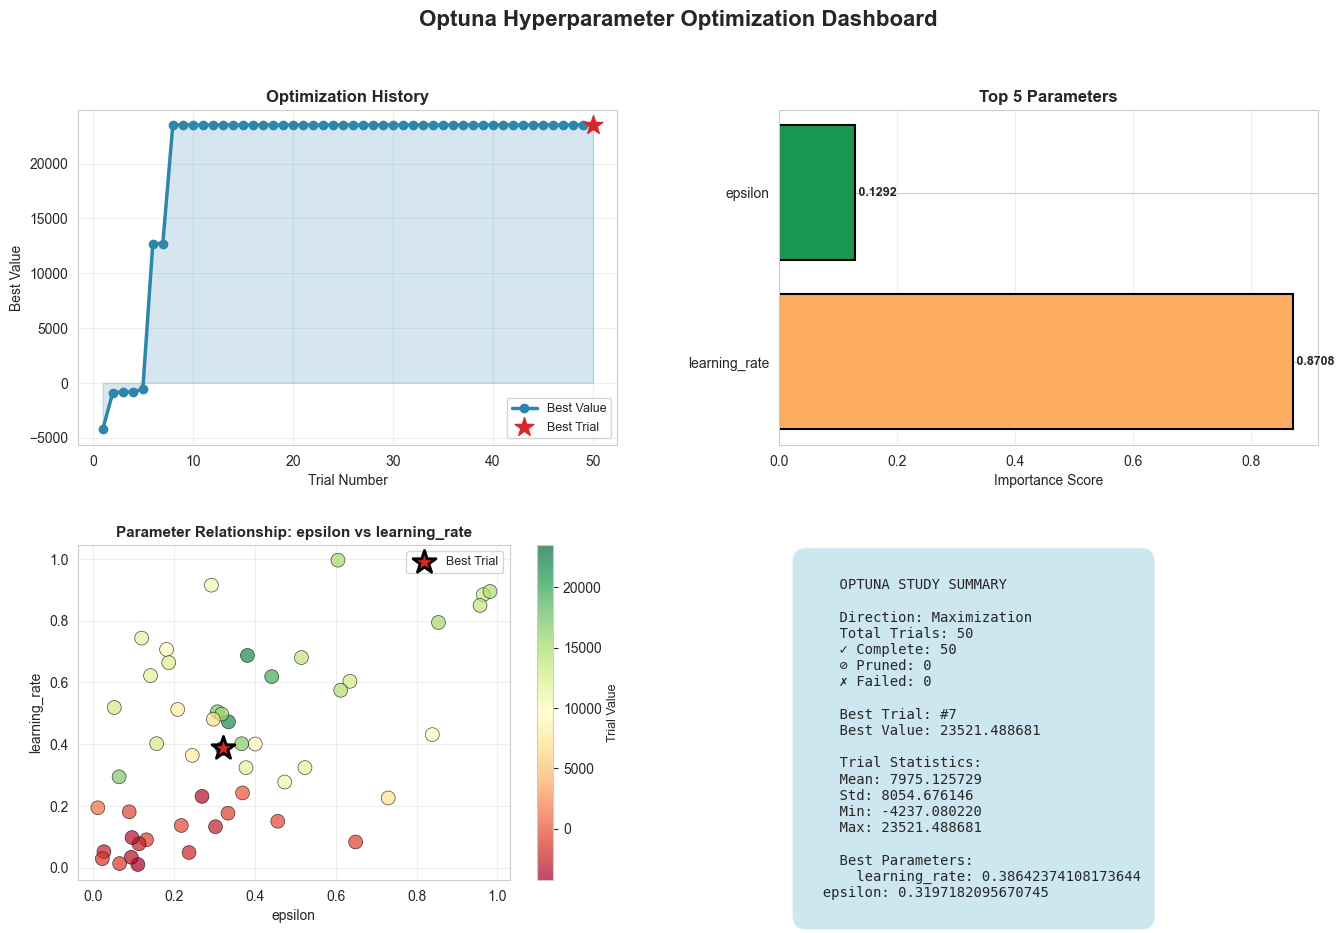

In [20]:
create_optuna_study_dashboard(study)

In [25]:
# We train the agent with specified parameters
TRAIN_CONFIG["learning_rate"] = study.best_params["learning_rate"]
TRAIN_CONFIG["epsilon"] = study.best_params["epsilon"]
agent.train(**TRAIN_CONFIG)

0 -886707.7236933893
5 53082.51105501495
mean reward 2.02 min reward -2270.88 max reward 690.48 max total reward 59527.83
10 60793.13984049492
mean reward 2.31 min reward -451.11 max reward 1259.73 max total reward 63994.5
15 49417.734260359364
mean reward 1.88 min reward -916.99 max reward 1259.73 max total reward 69208.48
20 68791.53119663599
mean reward 2.62 min reward -1959.58 max reward 1259.93 max total reward 69208.48
25 54764.31035201532
mean reward 2.08 min reward -917.89 max reward 1259.93 max total reward 69208.48
30 77592.93908961322
mean reward 2.95 min reward -458.59 max reward 1258.63 max total reward 77592.94
35 69262.84868825559
mean reward 2.63 min reward -363.21 max reward 1259.93 max total reward 77592.94
40 76208.39973301576
mean reward 2.9 min reward -457.14 max reward 1260.43 max total reward 77592.94
45 77898.73955396371
mean reward 2.96 min reward -1744.71 max reward 3311.78 max total reward 77898.74
50 82453.46427242886
mean reward 3.13 min reward -641.48 max 

In [26]:
# We replace the environment with the validation environment and let the agent play once
agent.env = validate_env
agent.env.reset()
water_levels, rewards, action_history = agent.play()

Total reward in evaluation: 22908.76
avg reward 1.31
max 144.420483036294 min -139.921368187005


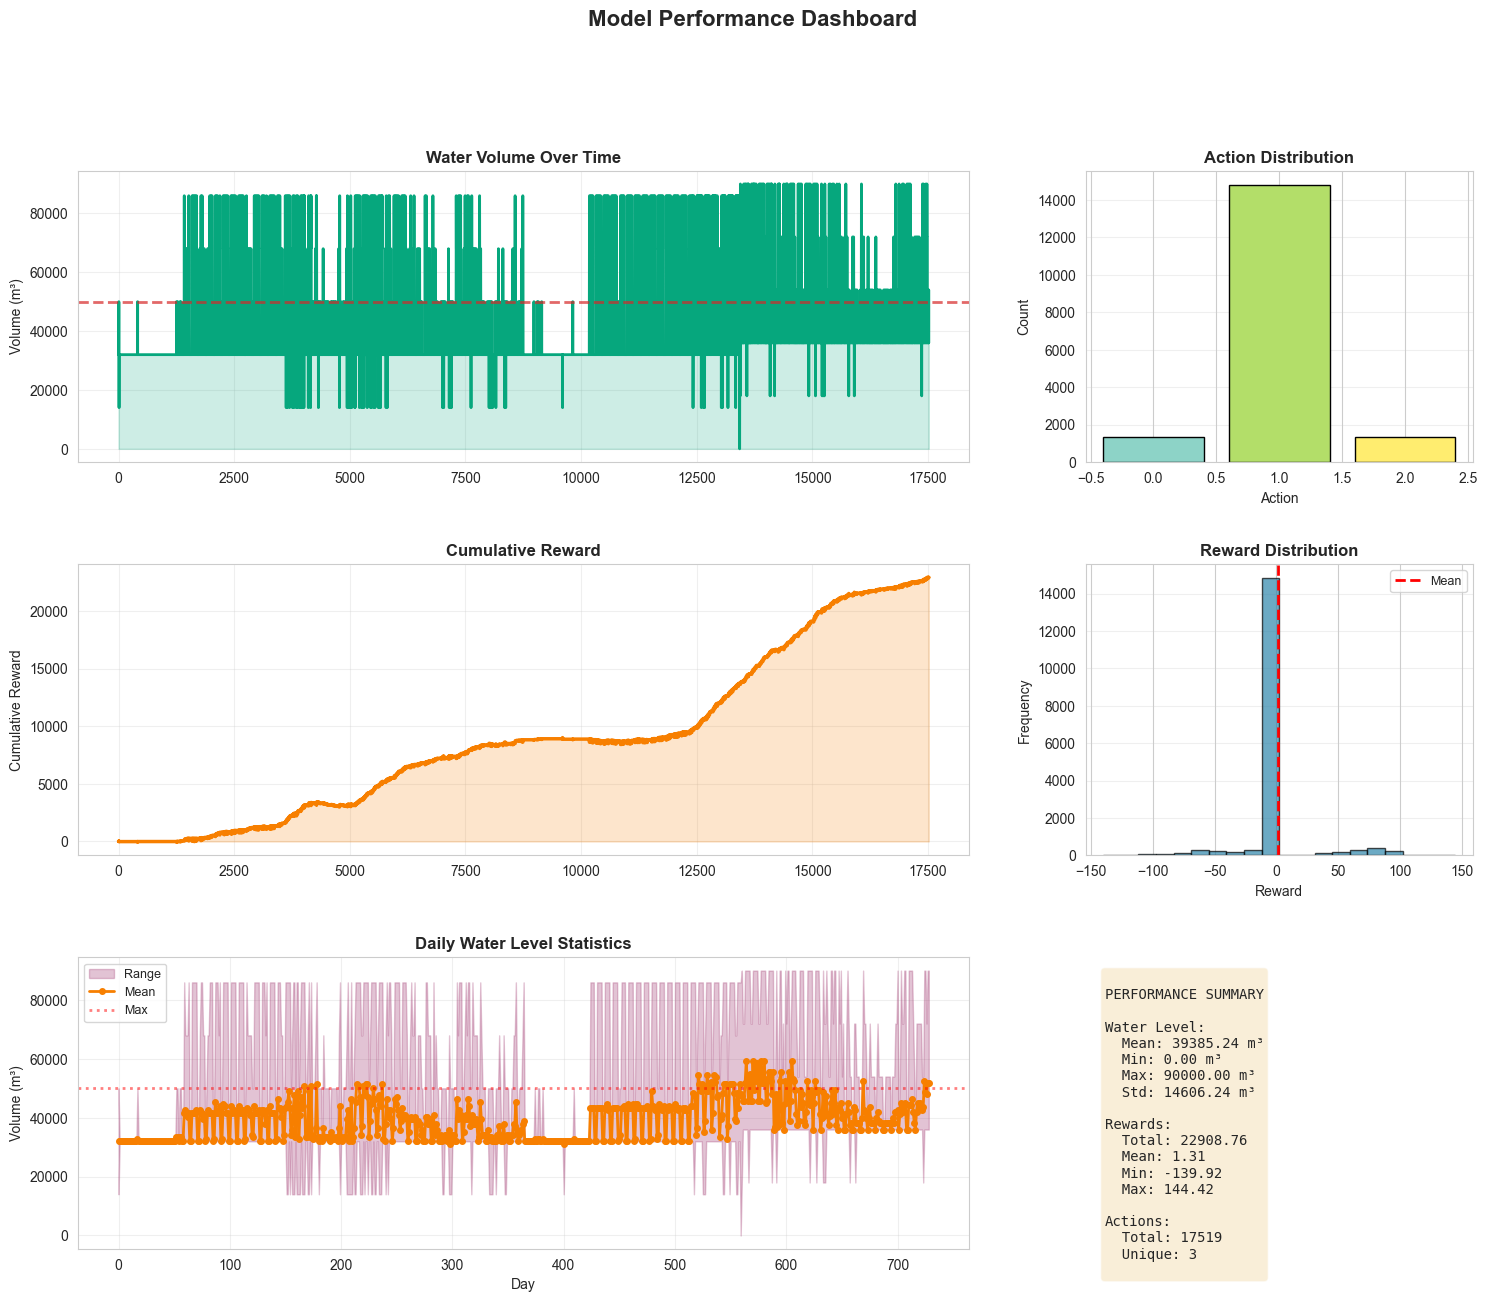

In [27]:
create_performance_dashboard(water_levels, rewards, action_history, max_volume = 50000)

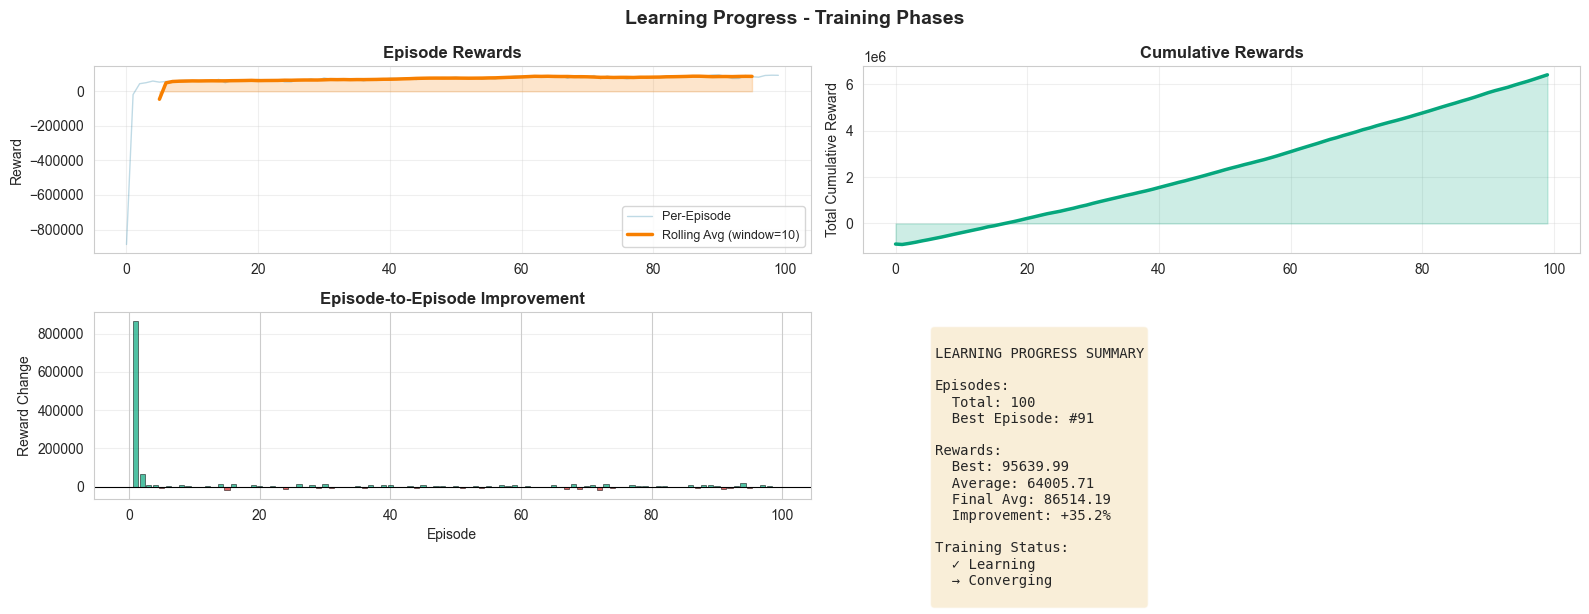

In [28]:
plot_learning_curve_with_phases(agent.train_curve)

### Experiment 3: 5 bins / reward shaping

In [36]:
TRAIN_CONFIG = {
    "learning_rate": 0.1,
    "simulations" : 100,
    "epsilon": 0.6,
    "epsilon_decay": 0.995,
    "adaptive_epsilon" : True,
    "adaptive_learning_rate" : True,
    "use_reward_shaping": True,
}

parameter_dict = {
    'learning_rate': (0.01, 1.0),
    'epsilon': (0.01, 1.0),
    
}

#We initialize the environment and the agent
env = HydroElectric_Test("data/train.xlsx")
validate_env = HydroElectric_Test("data/validate.xlsx")

#We select one of the wrappers
env = number_of_actions_env_wrapper(env,5)
validate_env = number_of_actions_env_wrapper(validate_env, 5)

env.reset(seed=SEED)
agent = QAgent(env, **AGENT_CONFIG)

In [34]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)
print("Best hyperparameters: ", study.best_params)

[I 2026-01-27 20:47:22,766] A new study created in memory with name: no-name-ab369a85-80f7-43ec-b457-ecee2436b474


0 -613587.2688363284
5 -8304.519656938664
mean reward -0.32 min reward -2297.87 max reward 1019.95 max total reward -3274.99
10 42.36708132031506
mean reward 0.0 min reward -510.63 max reward 1060.83 max total reward 42.37
15 4550.937719561521
mean reward 0.17 min reward -953.79 max reward 1259.93 max total reward 6656.95
20 5796.1323877867535
mean reward 0.22 min reward -641.34 max reward 1020.85 max total reward 6942.03
25 7842.828195958214
mean reward 0.3 min reward -458.48 max reward 662.63 max total reward 7842.83


[I 2026-01-27 20:48:30,821] Trial 0 finished with value: -6525.834757413633 and parameters: {'learning_rate': 0.2592679282362112, 'epsilon': 0.30120181984328004}. Best is trial 0 with value: -6525.834757413633.


Total reward in evaluation: -6525.83
avg reward -0.37
max 116.55613674483482 min -113.765434762275
0 -659939.5324641687
5 -329133.9465770909
mean reward -12.51 min reward -873.25 max reward 3311.78 max total reward 8146.83
10 -110107.2887992343
mean reward -4.19 min reward -458.05 max reward 3311.78 max total reward 8146.83
15 -62568.66895608699
mean reward -2.38 min reward -837.07 max reward 3311.78 max total reward 8146.83
20 -33395.1719466939
mean reward -1.27 min reward -871.9 max reward 3311.78 max total reward 8146.83
25 -11999.746707320523
mean reward -0.46 min reward -641.53 max reward 3311.33 max total reward 8146.83


[I 2026-01-27 20:49:39,370] Trial 1 finished with value: -1271.1003748794867 and parameters: {'learning_rate': 0.023593257457358616, 'epsilon': 0.7541547064893062}. Best is trial 1 with value: -1271.1003748794867.


Total reward in evaluation: -1271.1
avg reward -0.07
max 116.55613674483482 min -110.36258829
0 -659737.3302527986
5 -18470.578456013147
mean reward -0.7 min reward -4596.19 max reward 2234.22 max total reward 8146.83
10 16415.24971861813
mean reward 0.62 min reward -641.08 max reward 3311.78 max total reward 19081.23
15 43578.36135234196
mean reward 1.66 min reward -458.04 max reward 3311.78 max total reward 43578.36
20 39211.57508915654
mean reward 1.49 min reward -4596.64 max reward 1637.43 max total reward 46717.47
25 40036.29774446692
mean reward 1.52 min reward -365.18 max reward 1259.98 max total reward 50873.73


[I 2026-01-27 20:50:47,620] Trial 2 finished with value: 18373.764070999496 and parameters: {'learning_rate': 0.631980038196946, 'epsilon': 0.7917936887853311}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: 18373.76
avg reward 1.05
max 158.9221271376 min -122.152991472315
0 -625930.8335863859
5 -335350.30500495667
mean reward -12.75 min reward -735.3 max reward 1019.5 max total reward 68598.48
10 -122969.51704119188
mean reward -4.68 min reward -918.79 max reward 1258.58 max total reward 68598.48
15 -66560.83529400712
mean reward -2.53 min reward -1620.09 max reward 1019.5 max total reward 68598.48
20 -39477.092047340884
mean reward -1.5 min reward -415.02 max reward 1019.95 max total reward 68598.48
25 -23647.531767671095
mean reward -0.9 min reward -2297.87 max reward 1019.5 max total reward 68598.48


[I 2026-01-27 20:51:56,236] Trial 3 finished with value: -9208.821014425906 and parameters: {'learning_rate': 0.023051777952326498, 'epsilon': 0.031546629239712985}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: -9208.82
avg reward -0.53
max 132.435105948 min -119.577864412215
0 -647375.1498172765
5 -7152.617184379203
mean reward -0.27 min reward -1744.26 max reward 1061.73 max total reward 68598.48
10 31925.222357533446
mean reward 1.21 min reward -4595.74 max reward 1020.4 max total reward 68598.48
15 49597.11133309552
mean reward 1.89 min reward -732.15 max reward 1260.83 max total reward 68598.48
20 43757.87104976976
mean reward 1.66 min reward -363.18 max reward 1260.38 max total reward 68598.48
25 35887.70160706556
mean reward 1.36 min reward -641.48 max reward 3311.78 max total reward 68598.48


[I 2026-01-27 20:53:04,692] Trial 4 finished with value: 15041.603732898355 and parameters: {'learning_rate': 0.6683138474772855, 'epsilon': 0.07042290681272806}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: 15041.6
avg reward 0.86
max 172.1656377324 min -128.756353005
0 -637227.9107228919
5 -430518.65102467133
mean reward -16.37 min reward -1746.06 max reward 1019.5 max total reward 68598.48
10 -191045.95594324617
mean reward -7.26 min reward -553.22 max reward 1258.58 max total reward 68598.48
15 -103295.44904268494
mean reward -3.93 min reward -2298.32 max reward 2335.57 max total reward 68598.48
20 -58114.47393816278
mean reward -2.21 min reward -917.44 max reward 1019.5 max total reward 68598.48
25 -42051.182596908984
mean reward -1.6 min reward -917.46 max reward 1638.33 max total reward 68598.48


[I 2026-01-27 20:54:13,008] Trial 5 finished with value: 76.67661546624157 and parameters: {'learning_rate': 0.01763888243252043, 'epsilon': 0.035147688960560045}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: 76.68
avg reward 0.0
max 186.73349938668002 min -119.43071429449502
0 -647907.9187136983
5 -63491.82861552687
mean reward -2.41 min reward -979.34 max reward 1259.48 max total reward 68598.48
10 -2841.7800958480943
mean reward -0.11 min reward -459.39 max reward 1019.5 max total reward 68598.48
15 1853.7814103158978
mean reward 0.07 min reward -444.8 max reward 1019.95 max total reward 68598.48
20 623.7038988149521
mean reward 0.02 min reward -733.5 max reward 3312.23 max total reward 68598.48
25 -893.337531822403
mean reward -0.03 min reward -329.61 max reward 663.08 max total reward 68598.48


[I 2026-01-27 20:55:20,936] Trial 6 finished with value: -6399.327593957981 and parameters: {'learning_rate': 0.0764427350929219, 'epsilon': 0.5374291916820126}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: -6399.33
avg reward -0.37
max 158.9221271376 min -136.113858891
0 -641871.2345125795
5 11314.607104124501
mean reward 0.43 min reward -293.4 max reward 662.63 max total reward 68598.48
10 9749.122279918693
mean reward 0.37 min reward -980.69 max reward 1555.44 max total reward 68598.48
15 29979.634311692633
mean reward 1.14 min reward -642.43 max reward 1258.58 max total reward 68598.48
20 23675.89215851755
mean reward 0.9 min reward -327.1 max reward 1258.58 max total reward 68598.48
25 37912.96155915124
mean reward 1.44 min reward -458.04 max reward 531.09 max total reward 68598.48


[I 2026-01-27 20:56:28,850] Trial 7 finished with value: 11783.980079676498 and parameters: {'learning_rate': 0.3442621628825541, 'epsilon': 0.11988463735445411}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: 11783.98
avg reward 0.67
max 158.9221271376 min -123.2382235905
0 -672611.9975215873
5 -380518.7904075987
mean reward -14.47 min reward -466.93 max reward 3311.78 max total reward 68598.48
10 -153675.22789887845
mean reward -5.84 min reward -1746.06 max reward 3311.33 max total reward 68598.48
15 -88070.07855191726
mean reward -3.35 min reward -2271.33 max reward 3311.33 max total reward 68598.48
20 -47924.060149804514
mean reward -1.82 min reward -328.04 max reward 331.99 max total reward 68598.48
25 -28414.172236068203
mean reward -1.08 min reward -458.94 max reward 3311.33 max total reward 68598.48


[I 2026-01-27 20:57:37,055] Trial 8 finished with value: -1919.4618194432207 and parameters: {'learning_rate': 0.021066047160827932, 'epsilon': 0.04341561635060536}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: -1919.46
avg reward -0.11
max 116.55613674483482 min -110.896007466735
0 -661760.9990296491
5 -60855.032398255054
mean reward -2.31 min reward -366.53 max reward 3311.33 max total reward 68598.48
10 -15006.752196862448
mean reward -0.57 min reward -871.9 max reward 332.44 max total reward 68598.48
15 2332.07644722458
mean reward 0.09 min reward -365.18 max reward 3311.78 max total reward 68598.48
20 2555.08842174556
mean reward 0.1 min reward -871.9 max reward 1019.95 max total reward 68598.48
25 4312.001975548146
mean reward 0.16 min reward -733.95 max reward 630.42 max total reward 68598.48


[I 2026-01-27 20:58:44,775] Trial 9 finished with value: -3482.535618526265 and parameters: {'learning_rate': 0.07535612161346192, 'epsilon': 0.02241812673352582}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: -3482.54
avg reward -0.2
max 186.73349938668002 min -137.9532353625
0 -643319.0330043085
5 -122697.4387850939
mean reward -4.66 min reward -918.81 max reward 3311.33 max total reward 68598.48
10 -43779.16913573684
mean reward -1.66 min reward -363.38 max reward 1259.53 max total reward 68598.48
15 -3236.273448621114
mean reward -0.12 min reward -4595.74 max reward 1638.33 max total reward 68598.48
20 18348.165202093613
mean reward 0.7 min reward -2297.87 max reward 663.53 max total reward 68598.48
25 33408.423596263914
mean reward 1.27 min reward -706.77 max reward 531.54 max total reward 68598.48


[I 2026-01-27 20:59:53,467] Trial 10 finished with value: 5465.718670946439 and parameters: {'learning_rate': 0.9574375177437, 'epsilon': 0.1567304375906101}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: 5465.72
avg reward 0.31
max 144.420483036294 min -138.57862336281002
0 -667025.2215585604
5 -79834.8207421412
mean reward -3.04 min reward -4597.54 max reward 1259.93 max total reward 68598.48
10 -19076.090686197866
mean reward -0.73 min reward -916.99 max reward 3311.83 max total reward 68598.48
15 5569.167073997028
mean reward 0.21 min reward -366.08 max reward 1259.93 max total reward 68598.48
20 20070.467539767164
mean reward 0.76 min reward -1467.9 max reward 1260.83 max total reward 68598.48
25 28232.679499160662
mean reward 1.07 min reward -366.08 max reward 1061.28 max total reward 68598.48


[I 2026-01-27 21:01:02,441] Trial 11 finished with value: -12388.532726943205 and parameters: {'learning_rate': 0.9806058630148042, 'epsilon': 0.010289319635454958}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: -12388.53
avg reward -0.71
max 158.9221271376 min -174.75915855721502
0 -627044.1908487508
5 11325.878904365181
mean reward 0.43 min reward -385.1 max reward 3311.33 max total reward 68598.48
10 31167.797662295925
mean reward 1.18 min reward -917.44 max reward 1019.5 max total reward 68598.48
15 27735.512774463332
mean reward 1.05 min reward -916.99 max reward 663.08 max total reward 68598.48
20 38325.057176400274
mean reward 1.46 min reward -693.91 max reward 663.09 max total reward 68598.48
25 38334.639463273954
mean reward 1.46 min reward -466.93 max reward 663.08 max total reward 68598.48


[I 2026-01-27 21:02:10,970] Trial 12 finished with value: 8540.164257750976 and parameters: {'learning_rate': 0.3746371470835719, 'epsilon': 0.07388629841996186}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: 8540.16
avg reward 0.49
max 158.9221271376 min -115.95429276336
0 -654679.4471226287
5 -24741.721284047097
mean reward -0.94 min reward -872.8 max reward 3311.33 max total reward 68598.48
10 -1266.3862862816432
mean reward -0.05 min reward -441.06 max reward 531.09 max total reward 68598.48
15 2878.039665642769
mean reward 0.11 min reward -458.5 max reward 332.44 max total reward 68598.48
20 3948.3495517729657
mean reward 0.15 min reward -462.15 max reward 1019.5 max total reward 68598.48
25 3866.6079014557763
mean reward 0.15 min reward -549.11 max reward 1258.58 max total reward 68598.48


[I 2026-01-27 21:03:19,505] Trial 13 finished with value: -4382.022350365074 and parameters: {'learning_rate': 0.18310544893626993, 'epsilon': 0.2597738524277221}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: -4382.02
avg reward -0.25
max 158.9221271376 min -97.836434519085
0 -668827.7672829978
5 12694.727202173957
mean reward 0.48 min reward -550.07 max reward 3311.33 max total reward 68598.48
10 45884.213566105034
mean reward 1.74 min reward -918.29 max reward 1656.79 max total reward 68598.48
15 48223.10658557889
mean reward 1.83 min reward -444.8 max reward 1259.93 max total reward 68598.48
20 53228.686442250975
mean reward 2.02 min reward -2296.97 max reward 1259.98 max total reward 68598.48
25 48698.65338976812
mean reward 1.85 min reward -326.24 max reward 1060.88 max total reward 68598.48


[I 2026-01-27 21:04:28,057] Trial 14 finished with value: 12498.597336244895 and parameters: {'learning_rate': 0.5680713473994373, 'epsilon': 0.0745333622360534}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: 12498.6
avg reward 0.71
max 144.420483036294 min -138.57862336281002
0 -641990.363624486
5 -25132.432553237024
mean reward -0.96 min reward -917.89 max reward 663.08 max total reward 68598.48
10 -2571.6603242032447
mean reward -0.1 min reward -357.9 max reward 663.08 max total reward 68598.48
15 -846.9611190500968
mean reward -0.03 min reward -917.44 max reward 690.03 max total reward 68598.48
20 -433.9253782290224
mean reward -0.02 min reward -733.05 max reward 1061.28 max total reward 68598.48
25 10504.941020620043
mean reward 0.4 min reward -457.59 max reward 1019.5 max total reward 68598.48


[I 2026-01-27 21:05:36,063] Trial 15 finished with value: -8322.29710433235 and parameters: {'learning_rate': 0.1306831469356183, 'epsilon': 0.2177328449191372}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: -8322.3
avg reward -0.48
max 150.7906116323928 min -111.57657676119
0 -644704.6085517195
5 22312.995688648865
mean reward 0.85 min reward -837.52 max reward 3311.33 max total reward 68598.48
10 6315.086801756554
mean reward 0.24 min reward -1619.64 max reward 1555.44 max total reward 68598.48
15 28281.54198646998
mean reward 1.08 min reward -366.51 max reward 3311.33 max total reward 68598.48
20 70437.50131736384
mean reward 2.68 min reward -456.24 max reward 3311.33 max total reward 70437.5
25 50994.410843337275
mean reward 1.94 min reward -467.38 max reward 1656.34 max total reward 74862.16


[I 2026-01-27 21:06:45,224] Trial 16 finished with value: 10880.912817598322 and parameters: {'learning_rate': 0.567793110671122, 'epsilon': 0.49420682763908946}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: 10880.91
avg reward 0.62
max 158.9221271376 min -128.590809122565
0 -657043.5422566659
5 -103775.22996402445
mean reward -3.95 min reward -365.63 max reward 3311.78 max total reward 74862.16
10 -23695.39371135392
mean reward -0.9 min reward -871.9 max reward 3311.33 max total reward 74862.16
15 -2309.157399067031
mean reward -0.09 min reward -331.24 max reward 3311.33 max total reward 74862.16
20 464.6777064309777
mean reward 0.02 min reward -549.56 max reward 3311.78 max total reward 74862.16
25 -524.7769283184324
mean reward -0.02 min reward -330.19 max reward 3311.33 max total reward 74862.16


[I 2026-01-27 21:07:54,129] Trial 17 finished with value: -7401.775998916063 and parameters: {'learning_rate': 0.05329586606922907, 'epsilon': 0.9980623897557485}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: -7401.78
avg reward -0.42
max 158.9221271376 min -139.921368187005
0 -632185.0624733462
5 18571.24559529523
mean reward 0.71 min reward -2296.97 max reward 1019.5 max total reward 74862.16
10 47234.841513679006
mean reward 1.8 min reward -349.54 max reward 3311.78 max total reward 74862.16
15 53211.69937174761
mean reward 2.02 min reward -1413.5 max reward 3311.38 max total reward 74862.16
20 69232.43744454313
mean reward 2.63 min reward -1746.01 max reward 689.18 max total reward 74862.16
25 64108.10226577189
mean reward 2.44 min reward -1619.64 max reward 1259.48 max total reward 74862.16


[I 2026-01-27 21:09:00,834] Trial 18 finished with value: 17028.76466175085 and parameters: {'learning_rate': 0.5846204682323227, 'epsilon': 0.07041326133548399}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: 17028.76
avg reward 0.97
max 158.9221271376 min -183.93764715
0 -649841.2692185215
5 -3468.207674362115
mean reward -0.13 min reward -441.06 max reward 1019.5 max total reward 74862.16
10 2904.9261308644946
mean reward 0.11 min reward -483.54 max reward 3312.68 max total reward 74862.16
15 2393.417459409625
mean reward 0.09 min reward -787.84 max reward 662.63 max total reward 74862.16
20 13634.6194096707
mean reward 0.52 min reward -458.05 max reward 1637.88 max total reward 74862.16
25 12636.039194770032
mean reward 0.48 min reward -283.75 max reward 3311.33 max total reward 74862.16


[I 2026-01-27 21:10:04,339] Trial 19 finished with value: -4135.771410739482 and parameters: {'learning_rate': 0.21409293900265486, 'epsilon': 0.020642217063674417}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: -4135.77
avg reward -0.24
max 158.9221271376 min -136.113858891
0 -655553.3219420079
5 -168917.34740481622
mean reward -6.42 min reward -416.43 max reward 3311.78 max total reward 74862.16
10 -51940.46922428481
mean reward -1.97 min reward -917.89 max reward 3311.33 max total reward 74862.16
15 -16244.77004017086
mean reward -0.62 min reward -330.19 max reward 3311.33 max total reward 74862.16
20 -5772.917350408589
mean reward -0.22 min reward -458.94 max reward 3311.33 max total reward 74862.16
25 -12050.983547665392
mean reward -0.46 min reward -458.04 max reward 3311.78 max total reward 74862.16


[I 2026-01-27 21:11:08,099] Trial 20 finished with value: -4628.189782298853 and parameters: {'learning_rate': 0.03848434814281559, 'epsilon': 0.12896207664812404}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: -4628.19
avg reward -0.26
max 116.55613674483482 min -137.9532353625
0 -628118.8004904432
5 8497.415158431948
mean reward 0.32 min reward -1744.71 max reward 3311.33 max total reward 74862.16
10 24225.786426519317
mean reward 0.92 min reward -4595.74 max reward 1061.28 max total reward 74862.16
15 37675.44490325686
mean reward 1.43 min reward -917.44 max reward 1259.93 max total reward 74862.16
20 54503.416545986285
mean reward 2.07 min reward -872.8 max reward 1259.48 max total reward 74862.16
25 39524.12595357119
mean reward 1.5 min reward -1959.58 max reward 1259.93 max total reward 74862.16


[I 2026-01-27 21:12:12,496] Trial 21 finished with value: 5346.4677659208055 and parameters: {'learning_rate': 0.6047815144466903, 'epsilon': 0.06662777788240129}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: 5346.47
avg reward 0.31
max 144.420483036294 min -165.543882435
0 -653886.9544234339
5 20773.296157938916
mean reward 0.79 min reward -457.59 max reward 663.08 max total reward 74862.16
10 28861.133865857988
mean reward 1.1 min reward -365.19 max reward 664.88 max total reward 74862.16
15 35774.075088328435
mean reward 1.36 min reward -917.44 max reward 663.53 max total reward 74862.16
20 50946.18475304457
mean reward 1.94 min reward -365.18 max reward 663.08 max total reward 74862.16
25 47087.114718226076
mean reward 1.79 min reward -547.76 max reward 663.98 max total reward 74862.16


[I 2026-01-27 21:13:19,223] Trial 22 finished with value: 8245.19485715064 and parameters: {'learning_rate': 0.43018385975004303, 'epsilon': 0.052173411999258644}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: 8245.19
avg reward 0.47
max 158.9221271376 min -147.15011772
0 -651718.5831731025
5 -40620.52110058865
mean reward -1.54 min reward -837.52 max reward 1060.38 max total reward 74862.16
10 -2867.46493289299
mean reward -0.11 min reward -917.01 max reward 1638.78 max total reward 74862.16
15 35752.0282979874
mean reward 1.36 min reward -3241.07 max reward 3311.33 max total reward 74862.16
20 37498.64119306786
mean reward 1.43 min reward -459.39 max reward 1259.93 max total reward 74862.16
25 43239.19274485107
mean reward 1.64 min reward -458.5 max reward 1259.93 max total reward 74862.16


[I 2026-01-27 21:14:27,008] Trial 23 finished with value: 10764.777162314864 and parameters: {'learning_rate': 0.7700920945951553, 'epsilon': 0.09957351705187367}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: 10764.78
avg reward 0.61
max 189.7530198022944 min -128.590809122565
0 -669396.5620088816
5 -615993.6953778169
mean reward -23.42 min reward -873.25 max reward 1059.93 max total reward 74862.16
10 -369526.95358074084
mean reward -14.05 min reward -917.44 max reward 1638.78 max total reward 74862.16
15 -203834.2930399762
mean reward -7.75 min reward -918.79 max reward 1258.58 max total reward 74862.16
20 -138143.3853114583
mean reward -5.25 min reward -459.39 max reward 1019.5 max total reward 74862.16
25 -96273.39948338916
mean reward -3.66 min reward -420.61 max reward 1019.95 max total reward 74862.16


[I 2026-01-27 21:15:35,697] Trial 24 finished with value: -2081.4284825164546 and parameters: {'learning_rate': 0.010489906186369894, 'epsilon': 0.3951748679239085}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: -2081.43
avg reward -0.12
max 186.73349938668002 min -136.113858891
0 -678374.7029398036
5 -3675.753867376411
mean reward -0.14 min reward -917.46 max reward 1258.58 max total reward 74862.16
10 5383.345071242508
mean reward 0.2 min reward -917.44 max reward 663.98 max total reward 74862.16
15 5970.956199583295
mean reward 0.23 min reward -366.53 max reward 332.44 max total reward 74862.16
20 14414.881471540471
mean reward 0.55 min reward -1619.14 max reward 462.9 max total reward 74862.16
25 19985.926353626914
mean reward 0.76 min reward -309.09 max reward 1258.58 max total reward 74862.16


[I 2026-01-27 21:16:43,738] Trial 25 finished with value: -4242.880877801988 and parameters: {'learning_rate': 0.29323678688705596, 'epsilon': 0.1631746841299452}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: -4242.88
avg reward -0.24
max 132.435105948 min -119.577864412215
0 -634107.0078893828
5 -7139.319679059201
mean reward -0.27 min reward -459.39 max reward 1019.5 max total reward 74862.16
10 -8480.156999683246
mean reward -0.32 min reward -1413.1 max reward 2335.57 max total reward 74862.16
15 -1058.245506181942
mean reward -0.04 min reward -1744.71 max reward 1259.93 max total reward 74862.16
20 2298.5466027412804
mean reward 0.09 min reward -871.9 max reward 819.39 max total reward 74862.16
25 -1089.9017971785534
mean reward -0.04 min reward -457.59 max reward 662.63 max total reward 74862.16


[I 2026-01-27 21:17:52,784] Trial 26 finished with value: -7917.937041969561 and parameters: {'learning_rate': 0.1546498253056084, 'epsilon': 0.0891495467633639}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: -7917.94
avg reward -0.45
max 158.9221271376 min -137.9532353625
0 -643843.6437348524
5 18919.166828568435
mean reward 0.72 min reward -917.89 max reward 3311.33 max total reward 74862.16
10 29315.943414344947
mean reward 1.11 min reward -291.13 max reward 1656.79 max total reward 74862.16
15 33868.36046606006
mean reward 1.29 min reward -457.61 max reward 663.53 max total reward 74862.16
20 32413.12788996807
mean reward 1.23 min reward -954.69 max reward 662.63 max total reward 74862.16
25 35094.55379616443
mean reward 1.33 min reward -366.53 max reward 3311.33 max total reward 74862.16


[I 2026-01-27 21:19:01,663] Trial 27 finished with value: 8630.009705127237 and parameters: {'learning_rate': 0.463420896992786, 'epsilon': 0.0552717381154006}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: 8630.01
avg reward 0.49
max 158.9221271376 min -147.15011772
0 -662222.3922435401
5 -6594.714449134785
mean reward -0.25 min reward -420.16 max reward 1260.83 max total reward 74862.16
10 21225.66516910009
mean reward 0.81 min reward -2297.87 max reward 1061.33 max total reward 74862.16
15 15220.855093319145
mean reward 0.58 min reward -458.5 max reward 1061.28 max total reward 74862.16
20 29505.958286653986
mean reward 1.12 min reward -2298.32 max reward 1413.74 max total reward 74862.16
25 48359.03066277276
mean reward 1.84 min reward -916.99 max reward 1259.48 max total reward 74862.16


[I 2026-01-27 21:20:05,702] Trial 28 finished with value: 5087.017092860423 and parameters: {'learning_rate': 0.6889606633820062, 'epsilon': 0.02305126201662144}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: 5087.02
avg reward 0.29
max 158.9221271376 min -131.607386535825
0 -637759.887695937
5 -13514.087064078034
mean reward -0.51 min reward -305.95 max reward 1258.58 max total reward 74862.16
10 2819.9187185024625
mean reward 0.11 min reward -4596.64 max reward 1637.43 max total reward 74862.16
15 6093.901378409824
mean reward 0.23 min reward -511.08 max reward 1656.79 max total reward 74862.16
20 11353.913826457534
mean reward 0.43 min reward -365.77 max reward 663.08 max total reward 74862.16
25 7323.886217559666
mean reward 0.28 min reward -871.45 max reward 663.08 max total reward 74862.16


[I 2026-01-27 21:21:09,596] Trial 29 finished with value: -3434.16553545523 and parameters: {'learning_rate': 0.2349614940711863, 'epsilon': 0.17591593692087493}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: -3434.17
avg reward -0.2
max 158.9221271376 min -183.93764715
0 -658256.3135612002
5 1786.496247305113
mean reward 0.07 min reward -245.62 max reward 3311.78 max total reward 74862.16
10 841.0710588079289
mean reward 0.03 min reward -328.9 max reward 1656.79 max total reward 74862.16
15 14835.34452780032
mean reward 0.56 min reward -415.53 max reward 662.63 max total reward 74862.16
20 15974.521172499692
mean reward 0.61 min reward -457.6 max reward 1638.33 max total reward 74862.16
25 30440.102866484453
mean reward 1.16 min reward -837.52 max reward 663.13 max total reward 74862.16


[I 2026-01-27 21:22:13,592] Trial 30 finished with value: 590.2595884572956 and parameters: {'learning_rate': 0.277136835759492, 'epsilon': 0.325235568180144}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: 590.26
avg reward 0.03
max 172.1656377324 min -139.921368187005
0 -662458.7131832141
5 15644.895570825083
mean reward 0.59 min reward -329.27 max reward 3311.78 max total reward 74862.16
10 40566.372623708376
mean reward 1.54 min reward -458.04 max reward 1259.93 max total reward 74862.16
15 45010.32034802257
mean reward 1.71 min reward -916.99 max reward 3311.78 max total reward 74862.16
20 48672.952723395414
mean reward 1.85 min reward -979.34 max reward 663.08 max total reward 74862.16
25 57427.63865824699
mean reward 2.18 min reward -325.3 max reward 1259.48 max total reward 74862.16


[I 2026-01-27 21:23:22,049] Trial 31 finished with value: 9506.571920126496 and parameters: {'learning_rate': 0.5073836154806096, 'epsilon': 0.07484284418638688}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: 9506.57
avg reward 0.54
max 150.45952386752282 min -147.15011772
0 -629508.5459513024
5 9100.847951918971
mean reward 0.35 min reward -2298.77 max reward 2334.67 max total reward 74862.16
10 28131.118478862056
mean reward 1.07 min reward -458.49 max reward 1259.93 max total reward 74862.16
15 28929.668059935324
mean reward 1.1 min reward -346.78 max reward 662.63 max total reward 74862.16
20 37846.51103741284
mean reward 1.44 min reward -693.91 max reward 1259.53 max total reward 74862.16
25 40489.33400365631
mean reward 1.54 min reward -426.16 max reward 1656.34 max total reward 74862.16


[I 2026-01-27 21:24:31,720] Trial 32 finished with value: 7440.115226337401 and parameters: {'learning_rate': 0.6879797503018975, 'epsilon': 0.04110963660672713}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: 7440.12
avg reward 0.42
max 172.1656377324 min -130.393398064635
0 -638888.2800933577
5 -23465.472557847013
mean reward -0.89 min reward -918.34 max reward 3311.78 max total reward 74862.16
10 15114.13577080416
mean reward 0.57 min reward -2297.87 max reward 1413.74 max total reward 74862.16
15 27485.75574998114
mean reward 1.04 min reward -347.23 max reward 1259.48 max total reward 74862.16
20 53036.0470172663
mean reward 2.02 min reward -329.27 max reward 3311.33 max total reward 74862.16
25 59346.37673406241
mean reward 2.26 min reward -366.08 max reward 1312.84 max total reward 74862.16


[I 2026-01-27 21:25:41,266] Trial 33 finished with value: -336.9884845905603 and parameters: {'learning_rate': 0.8069567272081845, 'epsilon': 0.10503471361419299}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: -336.99
avg reward -0.02
max 189.7530198022944 min -131.36826759453
0 -616502.9506914552
5 4288.191047957162
mean reward 0.16 min reward -641.53 max reward 690.03 max total reward 74862.16
10 28966.765676119838
mean reward 1.1 min reward -851.41 max reward 3312.23 max total reward 74862.16
15 30995.848608651388
mean reward 1.18 min reward -551.68 max reward 639.06 max total reward 74862.16
20 26552.862329440475
mean reward 1.01 min reward -384.65 max reward 3311.33 max total reward 74862.16
25 36662.068218228196
mean reward 1.39 min reward -366.54 max reward 663.53 max total reward 74862.16


[I 2026-01-27 21:26:50,513] Trial 34 finished with value: 6302.219184646308 and parameters: {'learning_rate': 0.36131132567225566, 'epsilon': 0.03039013562605821}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: 6302.22
avg reward 0.36
max 172.1656377324 min -132.343137124425
0 -660615.8164964477
5 19070.978413856883
mean reward 0.73 min reward -456.69 max reward 3311.33 max total reward 74862.16
10 36379.46984628257
mean reward 1.38 min reward -694.36 max reward 1259.48 max total reward 74862.16
15 35788.46437138614
mean reward 1.36 min reward -339.44 max reward 1656.34 max total reward 74862.16
20 35210.67577136808
mean reward 1.34 min reward -2296.97 max reward 1259.48 max total reward 74862.16
25 47726.194278916584
mean reward 1.81 min reward -871.4 max reward 3311.33 max total reward 74862.16


[I 2026-01-27 21:28:00,331] Trial 35 finished with value: 11009.941766196378 and parameters: {'learning_rate': 0.47361167839523993, 'epsilon': 0.05857952742493009}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: 11009.94
avg reward 0.63
max 144.420483036294 min -139.921368187005
0 -657082.2315599925
5 -773.1808056311894
mean reward -0.03 min reward -275.48 max reward 666.28 max total reward 74862.16
10 28215.718110021688
mean reward 1.07 min reward -459.39 max reward 663.08 max total reward 74862.16
15 45106.49263081912
mean reward 1.71 min reward -365.61 max reward 3311.78 max total reward 74862.16
20 45908.10610916766
mean reward 1.75 min reward -328.82 max reward 1259.93 max total reward 74862.16
25 42370.39836137038
mean reward 1.61 min reward -1745.16 max reward 1259.48 max total reward 74862.16


[I 2026-01-27 21:29:09,475] Trial 36 finished with value: 3633.608758384691 and parameters: {'learning_rate': 0.5978886367616644, 'epsilon': 0.08594315190535284}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: 3633.61
avg reward 0.21
max 129.6672122336868 min -139.921368187005
0 -653623.1250842302
5 -25636.908409804186
mean reward -0.97 min reward -917.44 max reward 1168.01 max total reward 74862.16
10 -2616.8859985747354
mean reward -0.1 min reward -918.79 max reward 3311.78 max total reward 74862.16
15 -2880.8208308885305
mean reward -0.11 min reward -366.08 max reward 1019.5 max total reward 74862.16
20 -5177.281757588852
mean reward -0.2 min reward -328.82 max reward 662.63 max total reward 74862.16
25 -1582.8522870252702
mean reward -0.06 min reward -458.04 max reward 662.63 max total reward 74862.16


[I 2026-01-27 21:30:18,984] Trial 37 finished with value: -6772.628680973614 and parameters: {'learning_rate': 0.12113418899513238, 'epsilon': 0.6744585634559965}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: -6772.63
avg reward -0.39
max 186.73349938668002 min -147.15011772
0 -692058.3958313747
5 -1929.5746442937834
mean reward -0.07 min reward -917.44 max reward 663.53 max total reward 74862.16
10 12058.126494463124
mean reward 0.46 min reward -463.39 max reward 662.63 max total reward 74862.16
15 24746.78326376636
mean reward 0.94 min reward -2271.33 max reward 3311.78 max total reward 74862.16
20 29832.757569424633
mean reward 1.13 min reward -342.26 max reward 1060.38 max total reward 74862.16
25 15526.828866934222
mean reward 0.59 min reward -353.58 max reward 3312.68 max total reward 74862.16


[I 2026-01-27 21:31:28,659] Trial 38 finished with value: 2141.3939948638263 and parameters: {'learning_rate': 0.3128979879971602, 'epsilon': 0.12475680526782475}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: 2141.39
avg reward 0.12
max 116.55613674483482 min -131.99365559484002
0 -625303.9488314361
5 -142716.09544955788
mean reward -5.43 min reward -1744.26 max reward 2335.17 max total reward 74862.16
10 -84367.50434972967
mean reward -3.21 min reward -2298.77 max reward 1020.85 max total reward 74862.16
15 -43436.82058978671
mean reward -1.65 min reward -954.24 max reward 3311.33 max total reward 74862.16
20 -4535.659931025773
mean reward -0.17 min reward -347.25 max reward 1259.48 max total reward 74862.16
25 11269.974752319495
mean reward 0.43 min reward -4597.54 max reward 1637.88 max total reward 74862.16


[I 2026-01-27 21:32:39,104] Trial 39 finished with value: -4218.01336628298 and parameters: {'learning_rate': 0.9981673365372835, 'epsilon': 0.03983230667026034}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: -4218.01
avg reward -0.24
max 209.39314601438284 min -231.86260111493252
0 -645382.1011142187
5 -15743.163907227156
mean reward -0.6 min reward -458.05 max reward 3311.78 max total reward 74862.16
10 24534.97385245466
mean reward 0.93 min reward -365.18 max reward 1555.44 max total reward 74862.16
15 42199.388781918686
mean reward 1.6 min reward -384.71 max reward 1259.48 max total reward 74862.16
20 51588.0558618573
mean reward 1.96 min reward -2272.68 max reward 1259.48 max total reward 74862.16
25 48649.51920178074
mean reward 1.85 min reward -467.38 max reward 3312.68 max total reward 74862.16


[I 2026-01-27 21:33:48,694] Trial 40 finished with value: 6589.981908231319 and parameters: {'learning_rate': 0.7899615896779589, 'epsilon': 0.2174832646639972}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: 6589.98
avg reward 0.38
max 280.13997961180445 min -167.107352435775
0 -637692.7047895901
5 14946.15348078068
mean reward 0.57 min reward -733.05 max reward 1656.79 max total reward 74862.16
10 34350.34938666369
mean reward 1.31 min reward -308.19 max reward 662.63 max total reward 74862.16
15 36103.691676724346
mean reward 1.37 min reward -365.63 max reward 302.6 max total reward 74862.16
20 44293.90738217431
mean reward 1.68 min reward -915.64 max reward 663.08 max total reward 74862.16
25 46753.71457254629
mean reward 1.78 min reward -2297.42 max reward 663.53 max total reward 74862.16


[I 2026-01-27 21:34:58,431] Trial 41 finished with value: 10997.28391307011 and parameters: {'learning_rate': 0.37627117494525275, 'epsilon': 0.014744324534476176}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: 10997.28
avg reward 0.63
max 158.9221271376 min -183.93764715
0 -673610.1559017844
5 28081.072356162902
mean reward 1.07 min reward -871.45 max reward 1656.79 max total reward 74862.16
10 39171.47188581264
mean reward 1.49 min reward -2271.33 max reward 664.43 max total reward 74862.16
15 31377.49735098808
mean reward 1.19 min reward -2297.42 max reward 663.99 max total reward 74862.16
20 56259.59494387699
mean reward 2.14 min reward -316.33 max reward 1657.74 max total reward 74862.16
25 60114.32720690578
mean reward 2.29 min reward -2271.78 max reward 1656.34 max total reward 74862.16


[I 2026-01-27 21:36:08,306] Trial 42 finished with value: 11269.2416103861 and parameters: {'learning_rate': 0.5529753959340661, 'epsilon': 0.050646071082130394}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: 11269.24
avg reward 0.64
max 172.1656377324 min -131.71774912411502
0 -645225.4994910898
5 -810.1741779290622
mean reward -0.03 min reward -917.91 max reward 1259.03 max total reward 74862.16
10 9481.320475359653
mean reward 0.36 min reward -916.99 max reward 1555.44 max total reward 74862.16
15 23842.432308010695
mean reward 0.91 min reward -458.49 max reward 3311.33 max total reward 74862.16
20 28329.00811265254
mean reward 1.08 min reward -916.99 max reward 3311.33 max total reward 74862.16
25 32295.794168500066
mean reward 1.23 min reward -365.63 max reward 662.63 max total reward 74862.16


[I 2026-01-27 21:37:17,702] Trial 43 finished with value: 4157.286433826494 and parameters: {'learning_rate': 0.38795457778615494, 'epsilon': 0.0285616305980148}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: 4157.29
avg reward 0.24
max 134.0110837087812 min -138.57862336281002
0 -661601.7228422303
5 -38391.705450220536
mean reward -1.46 min reward -457.14 max reward 1260.43 max total reward 74862.16
10 2768.923362552786
mean reward 0.11 min reward -1135.89 max reward 3311.78 max total reward 74862.16
15 27371.840930119335
mean reward 1.04 min reward -2271.78 max reward 1259.48 max total reward 74862.16
20 45913.17141019765
mean reward 1.75 min reward -320.67 max reward 1655.89 max total reward 74862.16
25 49618.04277095897
mean reward 1.89 min reward -731.25 max reward 3311.78 max total reward 74862.16


[I 2026-01-27 21:38:27,310] Trial 44 finished with value: 815.1031289569901 and parameters: {'learning_rate': 0.8313411490190606, 'epsilon': 0.12357456508723948}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: 815.1
avg reward 0.05
max 209.39314601438284 min -137.5853600682
0 -643710.7611884836
5 -13078.17378662482
mean reward -0.5 min reward -458.49 max reward 530.64 max total reward 74862.16
10 -791.8108070034173
mean reward -0.03 min reward -837.97 max reward 819.84 max total reward 74862.16
15 5491.723754734742
mean reward 0.21 min reward -288.76 max reward 338.58 max total reward 74862.16
20 6726.340199662083
mean reward 0.26 min reward -733.5 max reward 1060.83 max total reward 74862.16
25 5142.9062855724405
mean reward 0.2 min reward -640.59 max reward 562.18 max total reward 74862.16


[I 2026-01-27 21:39:36,891] Trial 45 finished with value: -6349.149771690759 and parameters: {'learning_rate': 0.19925071452106843, 'epsilon': 0.07002645755913553}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: -6349.15
avg reward -0.36
max 158.9221271376 min -183.93764715
0 -645207.8702701393
5 -61229.257630755754
mean reward -2.33 min reward -918.79 max reward 1019.5 max total reward 74862.16
10 -6586.02636752177
mean reward -0.25 min reward -292.95 max reward 1019.5 max total reward 74862.16
15 -22788.794894991242
mean reward -0.87 min reward -917.89 max reward 1258.58 max total reward 74862.16
20 -12752.730867504448
mean reward -0.48 min reward -458.49 max reward 663.08 max total reward 74862.16
25 -2237.770743275886
mean reward -0.09 min reward -916.99 max reward 1060.38 max total reward 74862.16


[I 2026-01-27 21:40:45,823] Trial 46 finished with value: -9703.976746050183 and parameters: {'learning_rate': 0.08258965358607587, 'epsilon': 0.7825239853650358}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: -9703.98
avg reward -0.55
max 158.9221271376 min -131.66256782997
0 -659916.32472523
5 -29160.171129258324
mean reward -1.11 min reward -2298.32 max reward 1413.74 max total reward 74862.16
10 25859.569693429257
mean reward 0.98 min reward -283.41 max reward 662.63 max total reward 74862.16
15 30837.028867051933
mean reward 1.17 min reward -4597.09 max reward 1259.48 max total reward 74862.16
20 59455.468265247095
mean reward 2.26 min reward -979.79 max reward 1259.93 max total reward 74862.16
25 52550.19922654274
mean reward 2.0 min reward -271.28 max reward 3311.33 max total reward 74862.16


[I 2026-01-27 21:41:55,392] Trial 47 finished with value: 2125.5293727971352 and parameters: {'learning_rate': 0.6643356416843264, 'epsilon': 0.22422139657138015}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: 2125.53
avg reward 0.12
max 158.9221271376 min -128.149358769405
0 -631929.9245369029
5 -902.7159794054638
mean reward -0.03 min reward -2270.88 max reward 1259.93 max total reward 75376.5
10 29906.810275737127
mean reward 1.14 min reward -458.19 max reward 629.97 max total reward 75376.5
15 21910.54905615684
mean reward 0.83 min reward -440.61 max reward 488.04 max total reward 75376.5
20 31564.78753291462
mean reward 1.2 min reward -365.63 max reward 3311.33 max total reward 75376.5
25 28331.269074460095
mean reward 1.08 min reward -916.99 max reward 3311.33 max total reward 75376.5


[I 2026-01-27 21:43:04,871] Trial 48 finished with value: -3752.180115991702 and parameters: {'learning_rate': 0.30851435224225027, 'epsilon': 0.337552309503071}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: -3752.18
avg reward -0.21
max 160.24647819708002 min -2758.14501901425
0 -660028.2334103462
5 37783.444180403254
mean reward 1.44 min reward -459.39 max reward 1259.48 max total reward 75376.5
10 47174.69801599904
mean reward 1.79 min reward -978.84 max reward 1259.93 max total reward 75376.5
15 42380.948388758436
mean reward 1.61 min reward -916.99 max reward 3312.23 max total reward 75376.5
20 52499.89320775336
mean reward 2.0 min reward -1134.54 max reward 1259.48 max total reward 75376.5
25 50849.65490668031
mean reward 1.93 min reward -308.61 max reward 1656.34 max total reward 75376.5


[I 2026-01-27 21:44:11,603] Trial 49 finished with value: 5799.7780506937215 and parameters: {'learning_rate': 0.46276634757370055, 'epsilon': 0.03566035180597951}. Best is trial 2 with value: 18373.764070999496.


Total reward in evaluation: 5799.78
avg reward 0.33
max 158.9221271376 min -220.72517658
Best hyperparameters:  {'learning_rate': 0.631980038196946, 'epsilon': 0.7917936887853311}


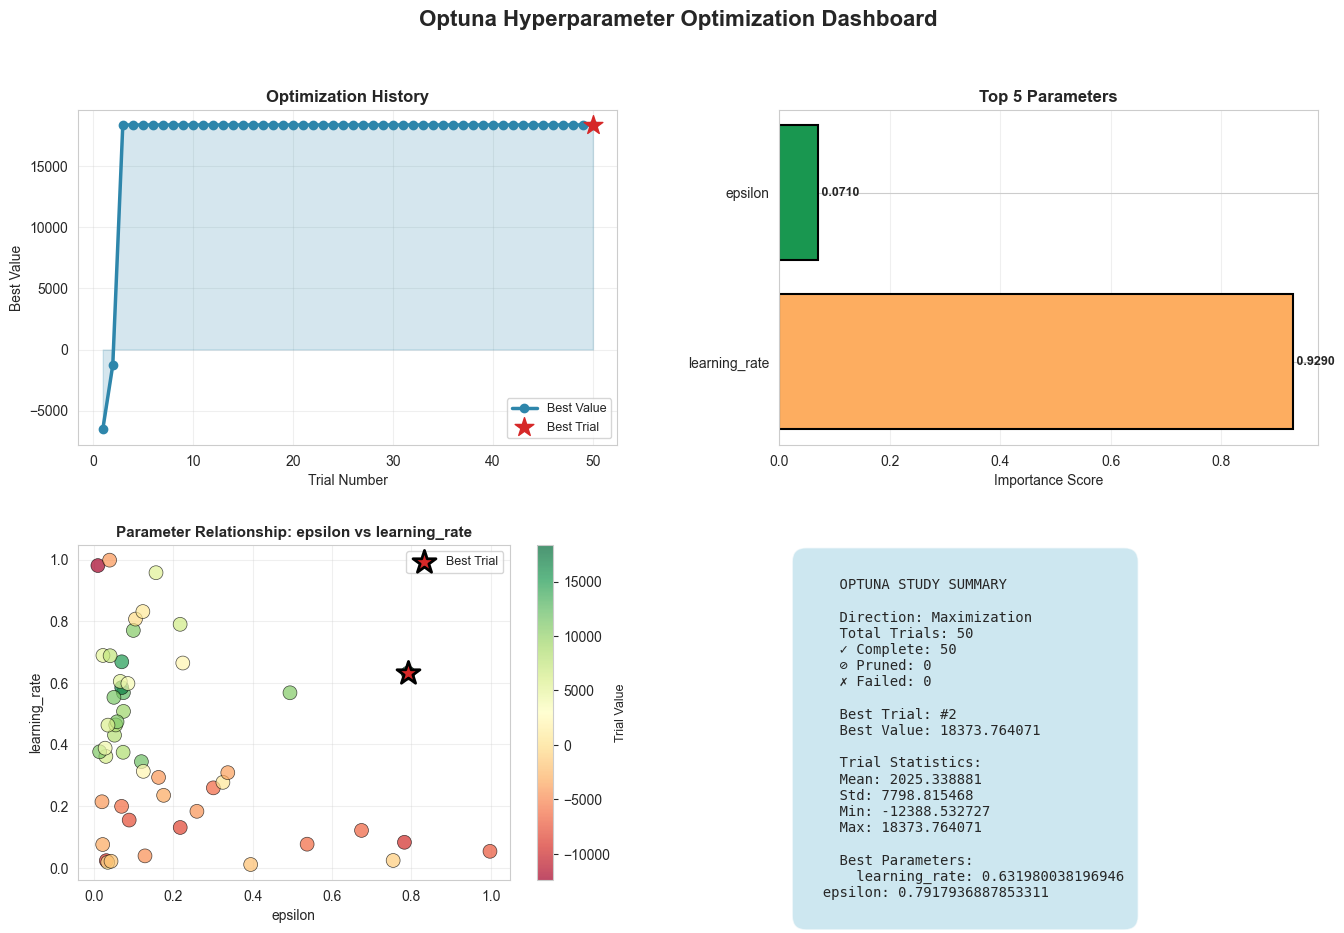

In [35]:
create_optuna_study_dashboard(study)

In [37]:
# We train the agent with specified parameters
TRAIN_CONFIG["learning_rate"] = study.best_params["learning_rate"]
TRAIN_CONFIG["epsilon"] = 0.1
agent.train(**TRAIN_CONFIG)

0 -658151.9213249884
5 -503.7843838692172
mean reward -0.02 min reward -882.11 max reward 3210.88 max total reward -503.78
10 33473.812094850604
mean reward 1.27 min reward -457.14 max reward 3311.33 max total reward 40661.14
15 42382.07023850655
mean reward 1.61 min reward -363.52 max reward 3311.78 max total reward 42382.07
20 46221.66036583408
mean reward 1.76 min reward -4596.14 max reward 662.63 max total reward 65589.64
25 58918.069566945014
mean reward 2.24 min reward -384.6 max reward 664.03 max total reward 65589.64
30 51506.18532642349
mean reward 1.96 min reward -551.87 max reward 1260.38 max total reward 65589.64
35 46199.82038197283
mean reward 1.76 min reward -551.68 max reward 1259.48 max total reward 65589.64
40 63105.316430494335
mean reward 2.4 min reward -335.73 max reward 1259.53 max total reward 69914.69
45 75985.46083851917
mean reward 2.89 min reward -872.35 max reward 1259.93 max total reward 75985.46
50 56646.57091805416
mean reward 2.15 min reward -871.9 max r

In [38]:
# We replace the environment with the validation environment and let the agent play once
agent.env = validate_env
agent.env.reset()
water_levels, rewards, action_history = agent.play()

Total reward in evaluation: 25444.37
avg reward 1.45
max 158.9221271376 min -132.416712183285


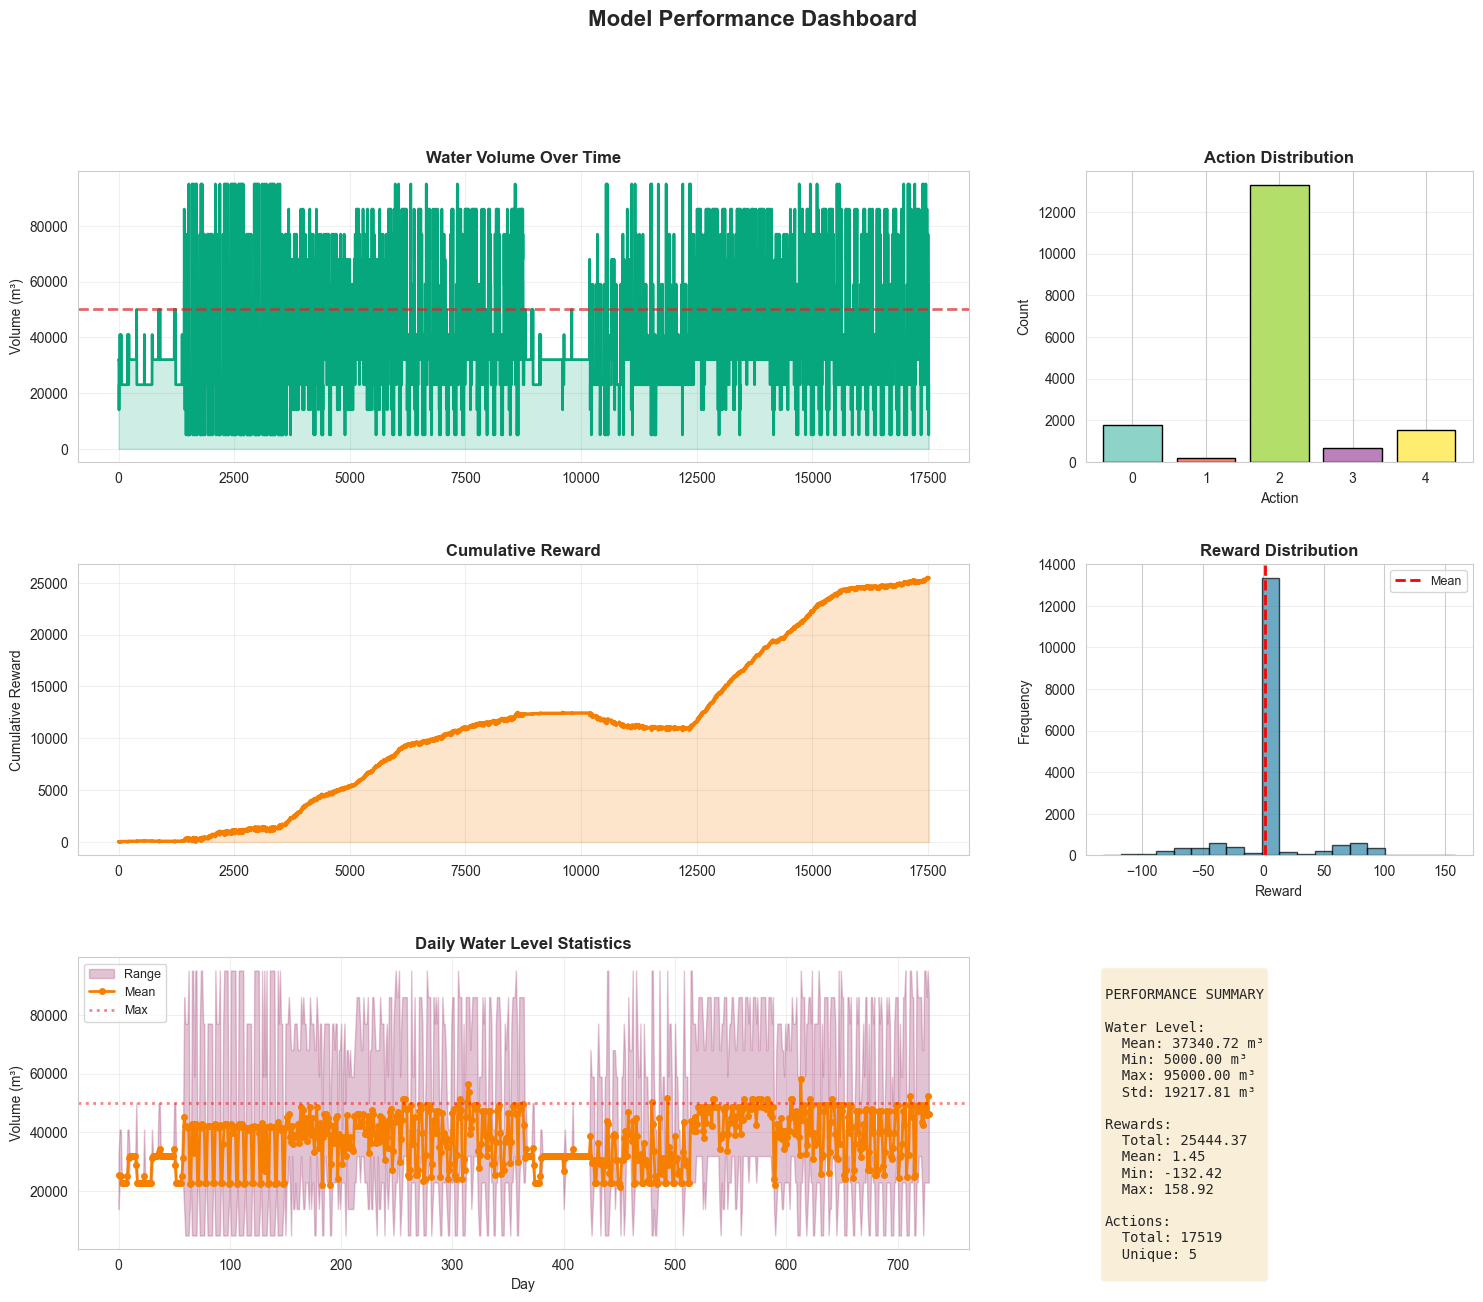

In [39]:
create_performance_dashboard(water_levels, rewards, action_history, max_volume = 50000)

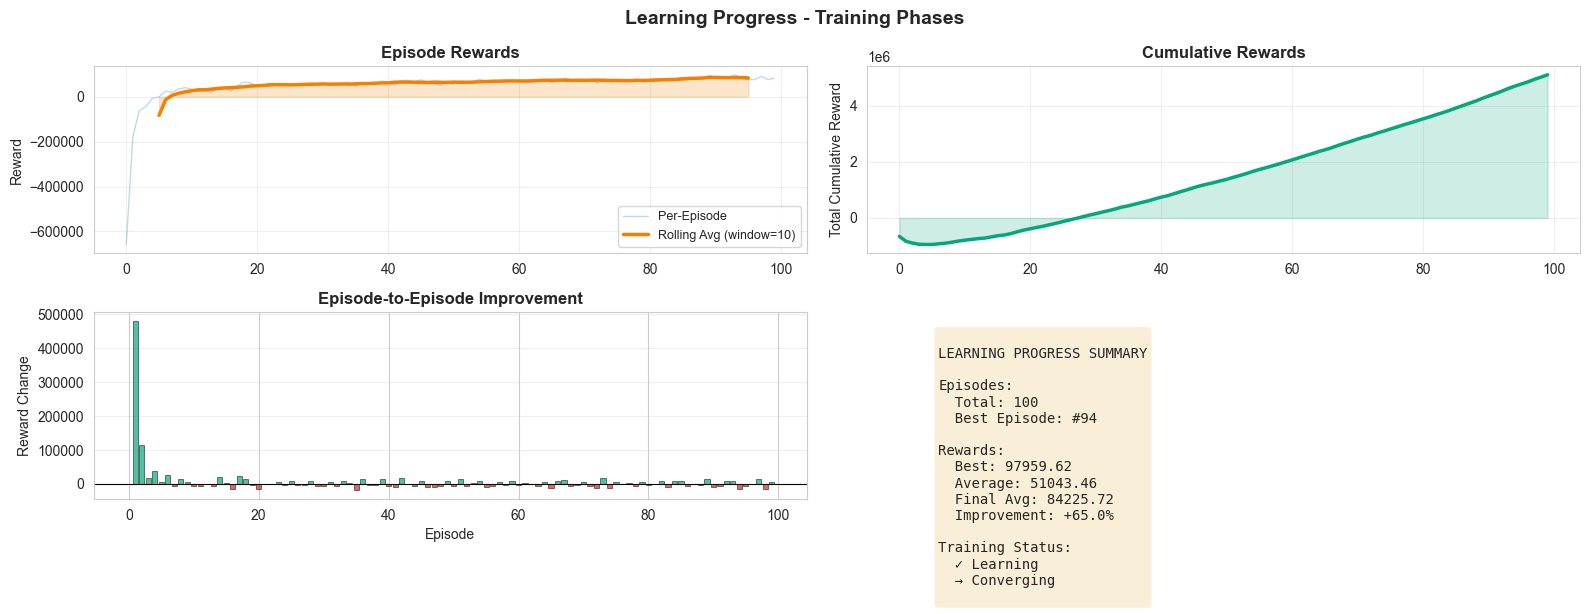

In [40]:
plot_learning_curve_with_phases(agent.train_curve)